In [1]:
import fitsio
import skymap
import numpy as np 
import pandas as pd 
import healpy as hp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [150]:
# cosmos_path="../data/hsc_dr2_cosmos.fits"
# cosmos_cat=fitsio.read(cosmos_path)

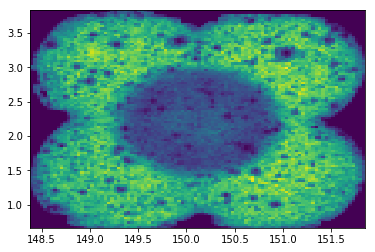

In [151]:
# bit=plt.hist2d(cosmos_cat["ra"], cosmos_cat["dec"], bins=100)

In [12]:
# sel= (cosmos_cat["g_psfflux_mag"] < 30) & (cosmos_cat["r_psfflux_mag"] < 30)
# cosmos_cat=cosmos_cat[sel]

/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


(-2, 4)

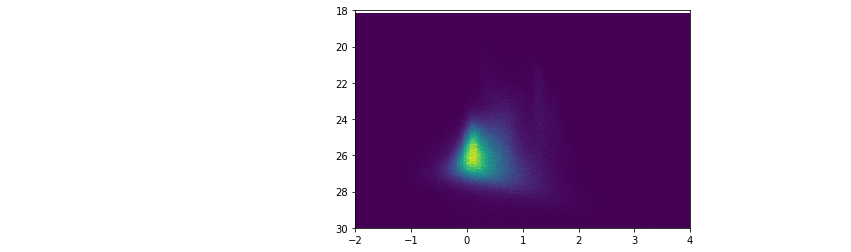

In [17]:
# bit=plt.hist2d(cosmos_cat["g_psfflux_mag"]-cosmos_cat["r_psfflux_mag"], cosmos_cat["g_psfflux_mag"], bins=600)
# plt.ylim(30,18)
# plt.xlim(-2,4)

In [24]:
# hsc_cos_pix=np.unique(hp.ang2pix(32,cosmos_cat["ra"], cosmos_cat["dec"],lonlat=True))

In [2]:
from glob import glob
flist=glob("/data/des91.b/data/kadrlica/projects/delve/cat/v7/cat/*.fits")


In [3]:
hpxlist=[int(i[-10:-5]) for i in flist]

In [27]:
[i if i in hpxlist for i in hsc_cos_pix]

SyntaxError: invalid syntax (<ipython-input-27-1b1a7805c0b0>, line 1)

In [4]:
uselist=[]
for i in hsc_cos_pix:
    if i in hpxlist:
        print(i)

NameError: name 'hsc_cos_pix' is not defined

In [30]:
hpxlist==6603

False

In [32]:
flist[0]

'/data/des91.b/data/kadrlica/projects/delve/cat/v7/cat/cat_hpx_05993.fits'

In [43]:
fgen=flist[0][:-10]
fbit=[fgen+"0"+str(i)+".fits" for i in [6005,6006,6133]]

In [11]:
from utils import load_infiles

In [42]:
flist[0]

'/data/des91.b/data/kadrlica/projects/delve/cat/v7/cat/cat_hpx_05993.fits'

In [40]:
fbit

['/data/des91.b/data/kadrlica/projects/delve/cat/v7/cat/cat_hpx_6005.fits',
 '/data/des91.b/data/kadrlica/projects/delve/cat/v7/cat/cat_hpx_6006.fits',
 '/data/des91.b/data/kadrlica/projects/delve/cat/v7/cat/cat_hpx_6133.fits']

In [87]:
delve_cosmos=load_infiles(fbit)

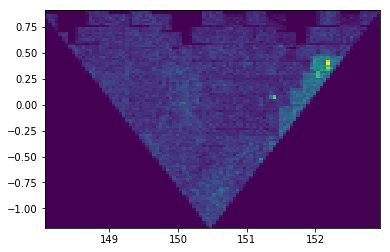

In [51]:
B1=plt.hist2d(delve_cosmos["RA"], delve_cosmos["DEC"], bins=100)


In [75]:
sel  = (delve_cosmos["RA"] > min(cosmos_cat["ra"])) 
sel &= (delve_cosmos["RA"] < max(cosmos_cat["ra"]))
sel &= (delve_cosmos["DEC"] > min(cosmos_cat["dec"]))

(0.6622356106612904, 3.8267593922436123)

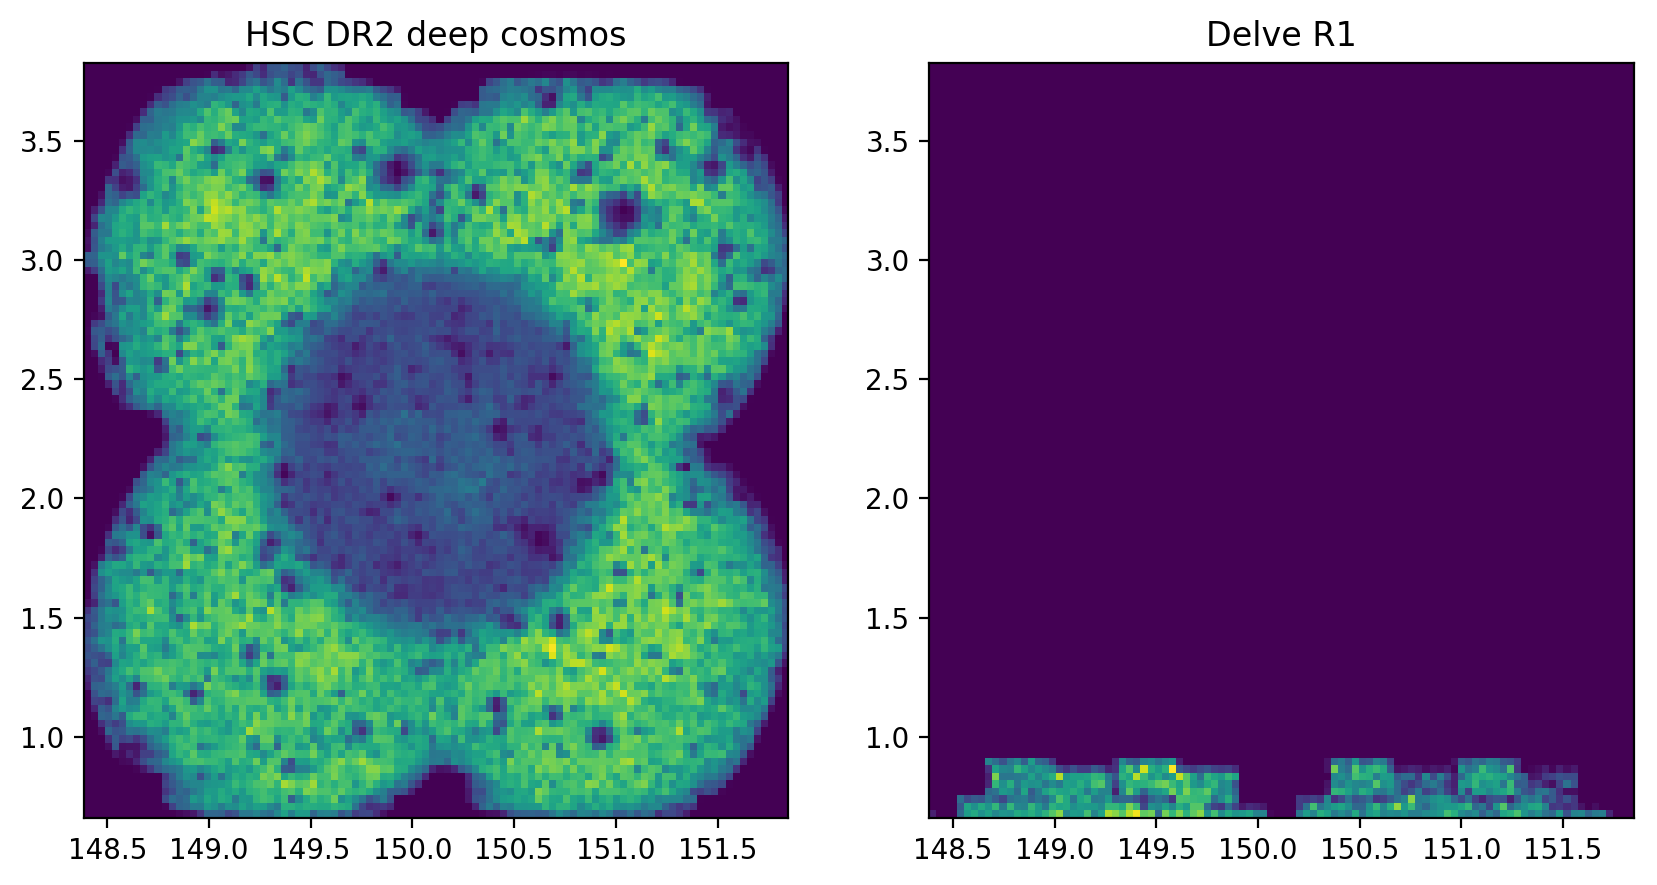

In [84]:
plt.subplots(2,1,figsize=(10,5),dpi=200)
plt.subplot(121)
plt.title("HSC DR2 deep cosmos")
bit=plt.hist2d(cosmos_cat["ra"], cosmos_cat["dec"], bins=100)
plt.xlim(min(cosmos_cat["ra"]), max(cosmos_cat["ra"]))
plt.ylim(min(cosmos_cat["dec"]), max(cosmos_cat["dec"]))
plt.subplot(122)
plt.title("Delve R1")
B1=plt.hist2d(delve_cosmos["RA"][sel], delve_cosmos["DEC"][sel], bins=bit[1:3])
plt.xlim(min(cosmos_cat["ra"]), max(cosmos_cat["ra"]))
plt.ylim(min(cosmos_cat["dec"]), max(cosmos_cat["dec"]))

In [12]:
w04cat=fitsio.read("../data/hsc_wide_v1.0.fits")
w04cat=w04cat[(w04cat["g_psfflux_mag"] < 30) &(w04cat["r_psfflux_mag"] < 30)]

/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


In [17]:
hsc_w04_pix=np.unique(hp.ang2pix(32,w04cat["ra"], w04cat["dec"],lonlat=True))

In [18]:
fgen=flist[0][:-10]
fbit=[fgen+"0"+str(i)+".fits" for i in hsc_w04_pix]

In [15]:
import os
fsel=[]
for i in fbit:
    fsel.append(os.path.exists(i))

In [19]:
delve_w04=load_infiles(fbit)

(-2.5216079427984335, -2.3644267154547073e-07)

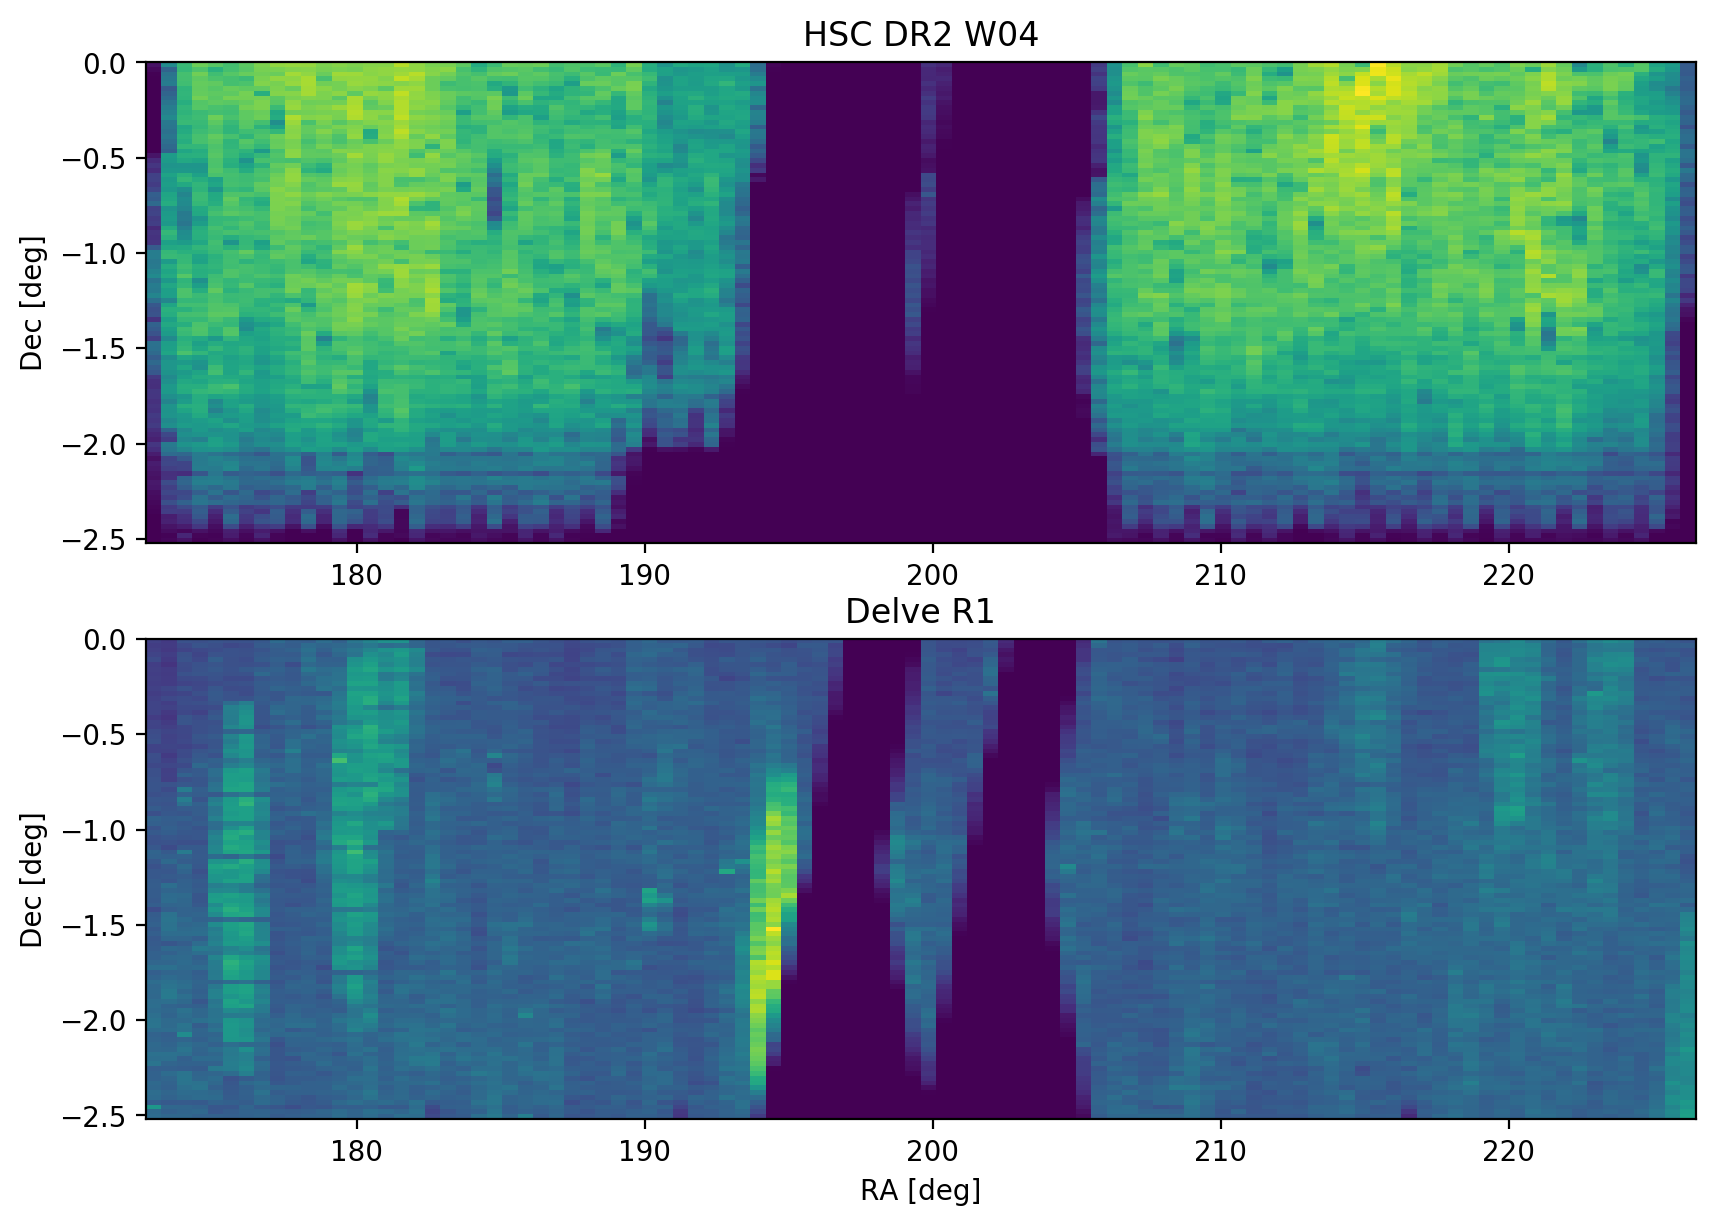

In [10]:
plt.subplots(1,2,figsize=(10,7),dpi=200)
plt.subplot(211)
plt.title("HSC DR2 W04")
bit=plt.hist2d(w04cat["ra"], w04cat["dec"], bins=100)
plt.ylabel("Dec [deg]")
plt.xlim(min(w04cat["ra"]), max(w04cat["ra"]))
plt.ylim(min(w04cat["dec"]), max(w04cat["dec"]))
plt.subplot(212)
plt.title("Delve R1")
B1=plt.hist2d(delve_w04["RA"], delve_w04["DEC"], bins=bit[1:3])
plt.ylabel("Dec [deg]")
plt.xlabel("RA [deg]")
plt.xlim(min(w04cat["ra"]), max(w04cat["ra"]))
plt.ylim(min(w04cat["dec"]), max(w04cat["dec"]))

In [20]:
from match import match_query

In [21]:
idx_hsc,idx_delve,sep = match_query(w04cat['ra'],w04cat['dec'],delve_w04['RA'],delve_w04['DEC'])

In [22]:
sel = sep < (0.5 * (1/3600.))
delve_match_cat=delve_w04[idx_delve[sel]]
hsc_match_cat=w04cat[idx_hsc[sel]]
selgr  =(delve_match_cat["MAG_PSF_G"] < 30) & (delve_match_cat["MAG_PSF_R"] < 30) 
selgr &=(hsc_match_cat["g_psfflux_mag"] < 30)  & (hsc_match_cat["g_psfflux_mag"] < 30)
delve_match_cat=delve_match_cat[selgr]
hsc_match_cat=hsc_match_cat[selgr]

In [23]:
#|spread_model_r/spread_err_r^2+spread_model_g/spread_err_g^2|*(1/spread_err_r^2+1/spread_err_g^2)^-1 < 0.003
sel_star_delve2=abs(delve_match_cat["SPREAD_MODEL_G"]/delve_match_cat["SPREADERR_MODEL_G"]**2 +\
               delve_match_cat["SPREAD_MODEL_R"]/delve_match_cat["SPREADERR_MODEL_R"]**2)*\
               (1/delve_match_cat["SPREAD_MODEL_R"]**2+1/delve_match_cat["SPREAD_MODEL_G"]**2)**-1 < 0.003
sel_star_hsc=(hsc_match_cat["g_extendedness_value"]==0) & (hsc_match_cat["r_extendedness_value"]==0)

sel_star_delve=(abs(delve_match_cat["SPREAD_MODEL_G"]) < 0.003) & (abs(delve_match_cat["SPREAD_MODEL_R"]) < 0.003)
               

In [24]:
sel=(delve_match_cat["MAG_PSF_G"] < 30) & (hsc_match_cat["g_psfflux_mag"] <30) & sel_star_delve
g_delve=delve_match_cat["MAG_PSF_G"][sel]
g_diff=delve_match_cat["MAG_PSF_G"][sel]-hsc_match_cat["g_psfflux_mag"][sel]

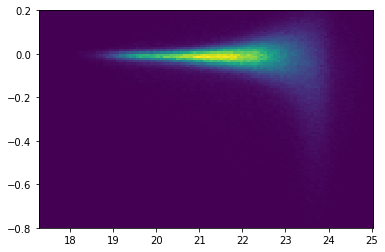

In [25]:
sel2=(g_diff <0.2) & (g_diff > -0.8)
bit=plt.hist2d(g_delve[sel2],g_diff[sel2], bins=100)

/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in less
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in greater


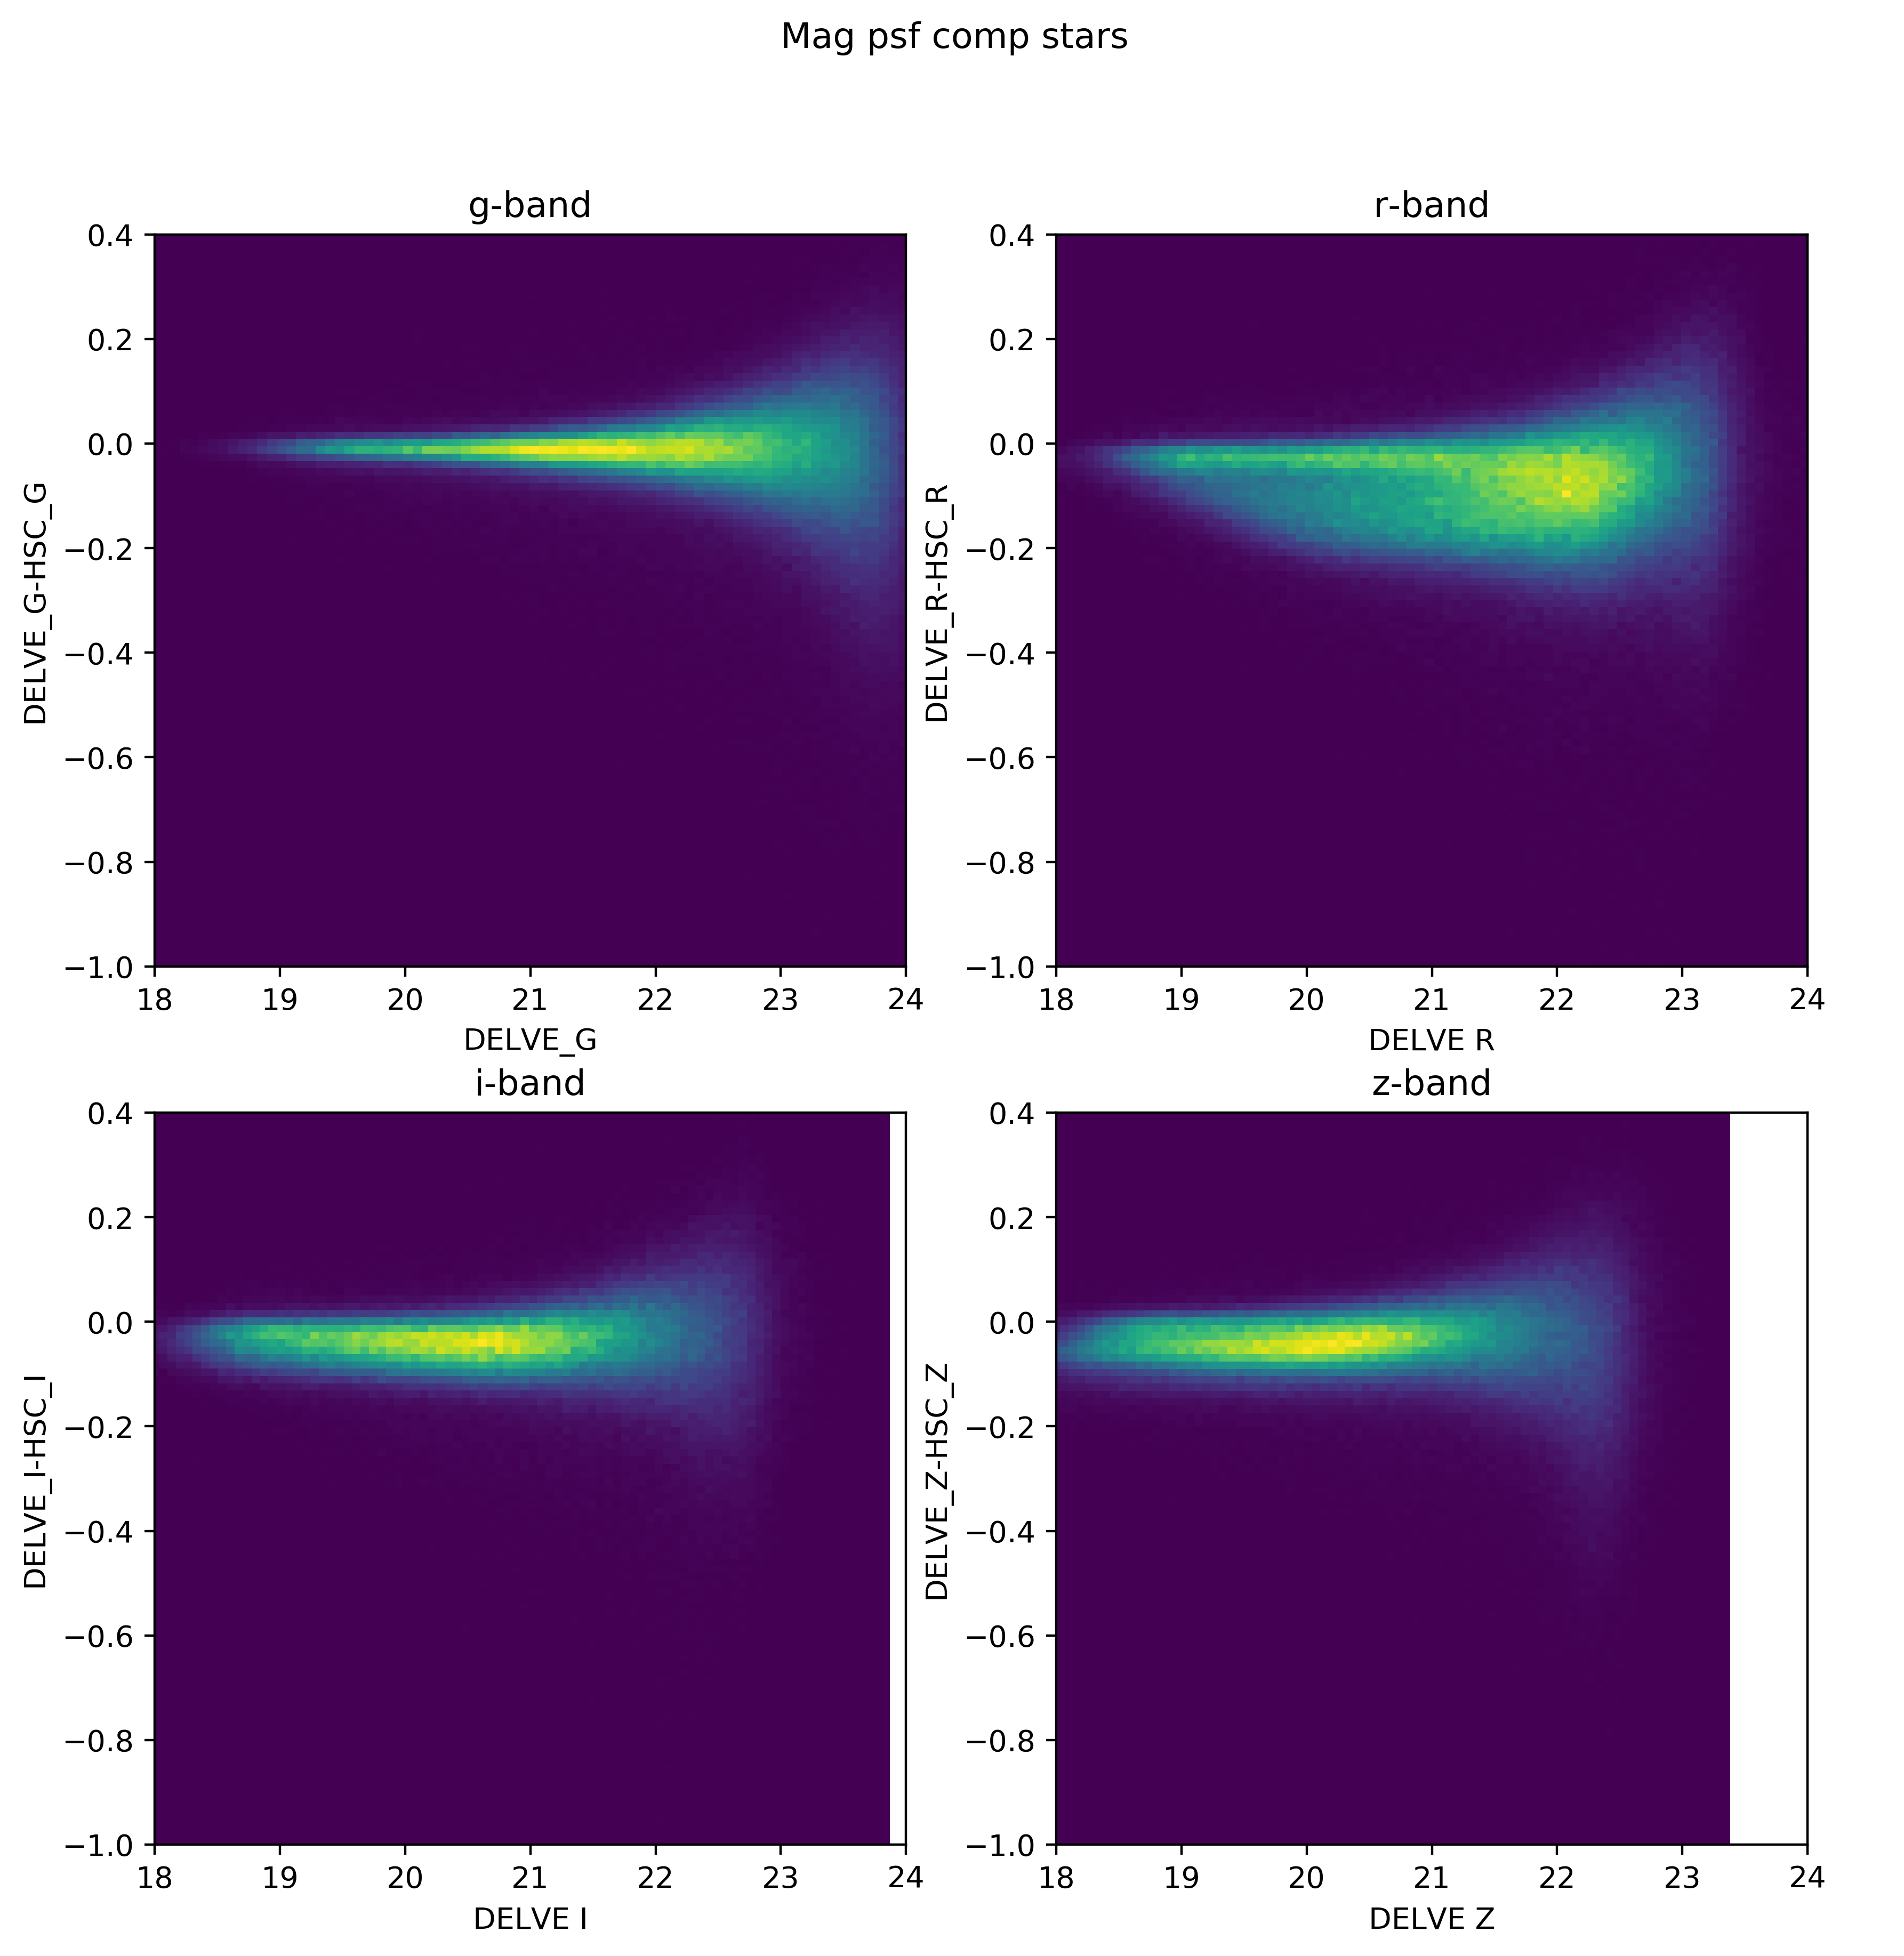

In [385]:
seldiffg  = (delve_match_cat["MAG_PSF_G"]-hsc_match_cat["g_psfflux_mag"] < 0.4) 
seldiffg &= (delve_match_cat["MAG_PSF_G"]-hsc_match_cat["g_psfflux_mag"] > -1)
seldiffg &= (hsc_match_cat["g_extendedness_value"]==0)
          
seldiffr  = (delve_match_cat["MAG_PSF_R"]-hsc_match_cat["r_psfflux_mag"] < 0.4) 
seldiffr &= (delve_match_cat["MAG_PSF_R"]-hsc_match_cat["r_psfflux_mag"] > -1)
seldiffr &= (hsc_match_cat["r_extendedness_value"]==0)

plt.figure(dpi=400, figsize=(10,10))
plt.suptitle("Mag psf comp stars")
plt.subplot(221)
plt.title("g-band")
bit=plt.hist2d(delve_match_cat["MAG_PSF_G"][seldiffg],
               delve_match_cat["MAG_PSF_G"][seldiffg]-hsc_match_cat["g_psfflux_mag"][seldiffg],
               bins=100)
plt.xlim(18,24)
plt.ylim(-1,0.4)
plt.xlabel("DELVE_G")
plt.ylabel("DELVE_G-HSC_G")
plt.subplot(222)
plt.title("r-band")
plt.hist2d(delve_match_cat["MAG_PSF_R"][seldiffr],
           delve_match_cat["MAG_PSF_R"][seldiffr]-hsc_match_cat["r_psfflux_mag"][seldiffr],
           bins=100)
plt.xlim(18,24)
plt.ylim(-1,0.4)
plt.xlabel("DELVE R")
plt.ylabel("DELVE_R-HSC_R")

seldiffi  = (delve_match_cat["MAG_PSF_I"]-hsc_match_cat["i_psfflux_mag"] < 0.4) 
seldiffi &= (delve_match_cat["MAG_PSF_I"]-hsc_match_cat["i_psfflux_mag"] > -1)
seldiffi &= (hsc_match_cat["i_extendedness_value"]==0)
plt.subplot(223)
plt.title("i-band")
plt.hist2d(delve_match_cat["MAG_PSF_I"][seldiffi],
           delve_match_cat["MAG_PSF_I"][seldiffi]-hsc_match_cat["i_psfflux_mag"][seldiffi],
           bins=100)
plt.xlim(18,24)
plt.ylim(-1,0.4)
plt.xlabel("DELVE I")
plt.ylabel("DELVE_I-HSC_I")


seldiffz  = (delve_match_cat["MAG_PSF_Z"]-hsc_match_cat["z_psfflux_mag"] < 0.4) 
seldiffz &= (delve_match_cat["MAG_PSF_Z"]-hsc_match_cat["z_psfflux_mag"] > -1)
seldiffz &= (hsc_match_cat["z_extendedness_value"]==0)
plt.subplot(224)
plt.title("z-band")
plt.hist2d(delve_match_cat["MAG_PSF_Z"][seldiffz],
           delve_match_cat["MAG_PSF_Z"][seldiffz]-hsc_match_cat["z_psfflux_mag"][seldiffz],
           bins=100)
plt.xlim(18,24)
plt.ylim(-1,0.4)
plt.xlabel("DELVE Z")
plt.ylabel("DELVE_Z-HSC_Z")
plt.savefig("../plots/diff_stars_psf_comp.png")

/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in less
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in greater


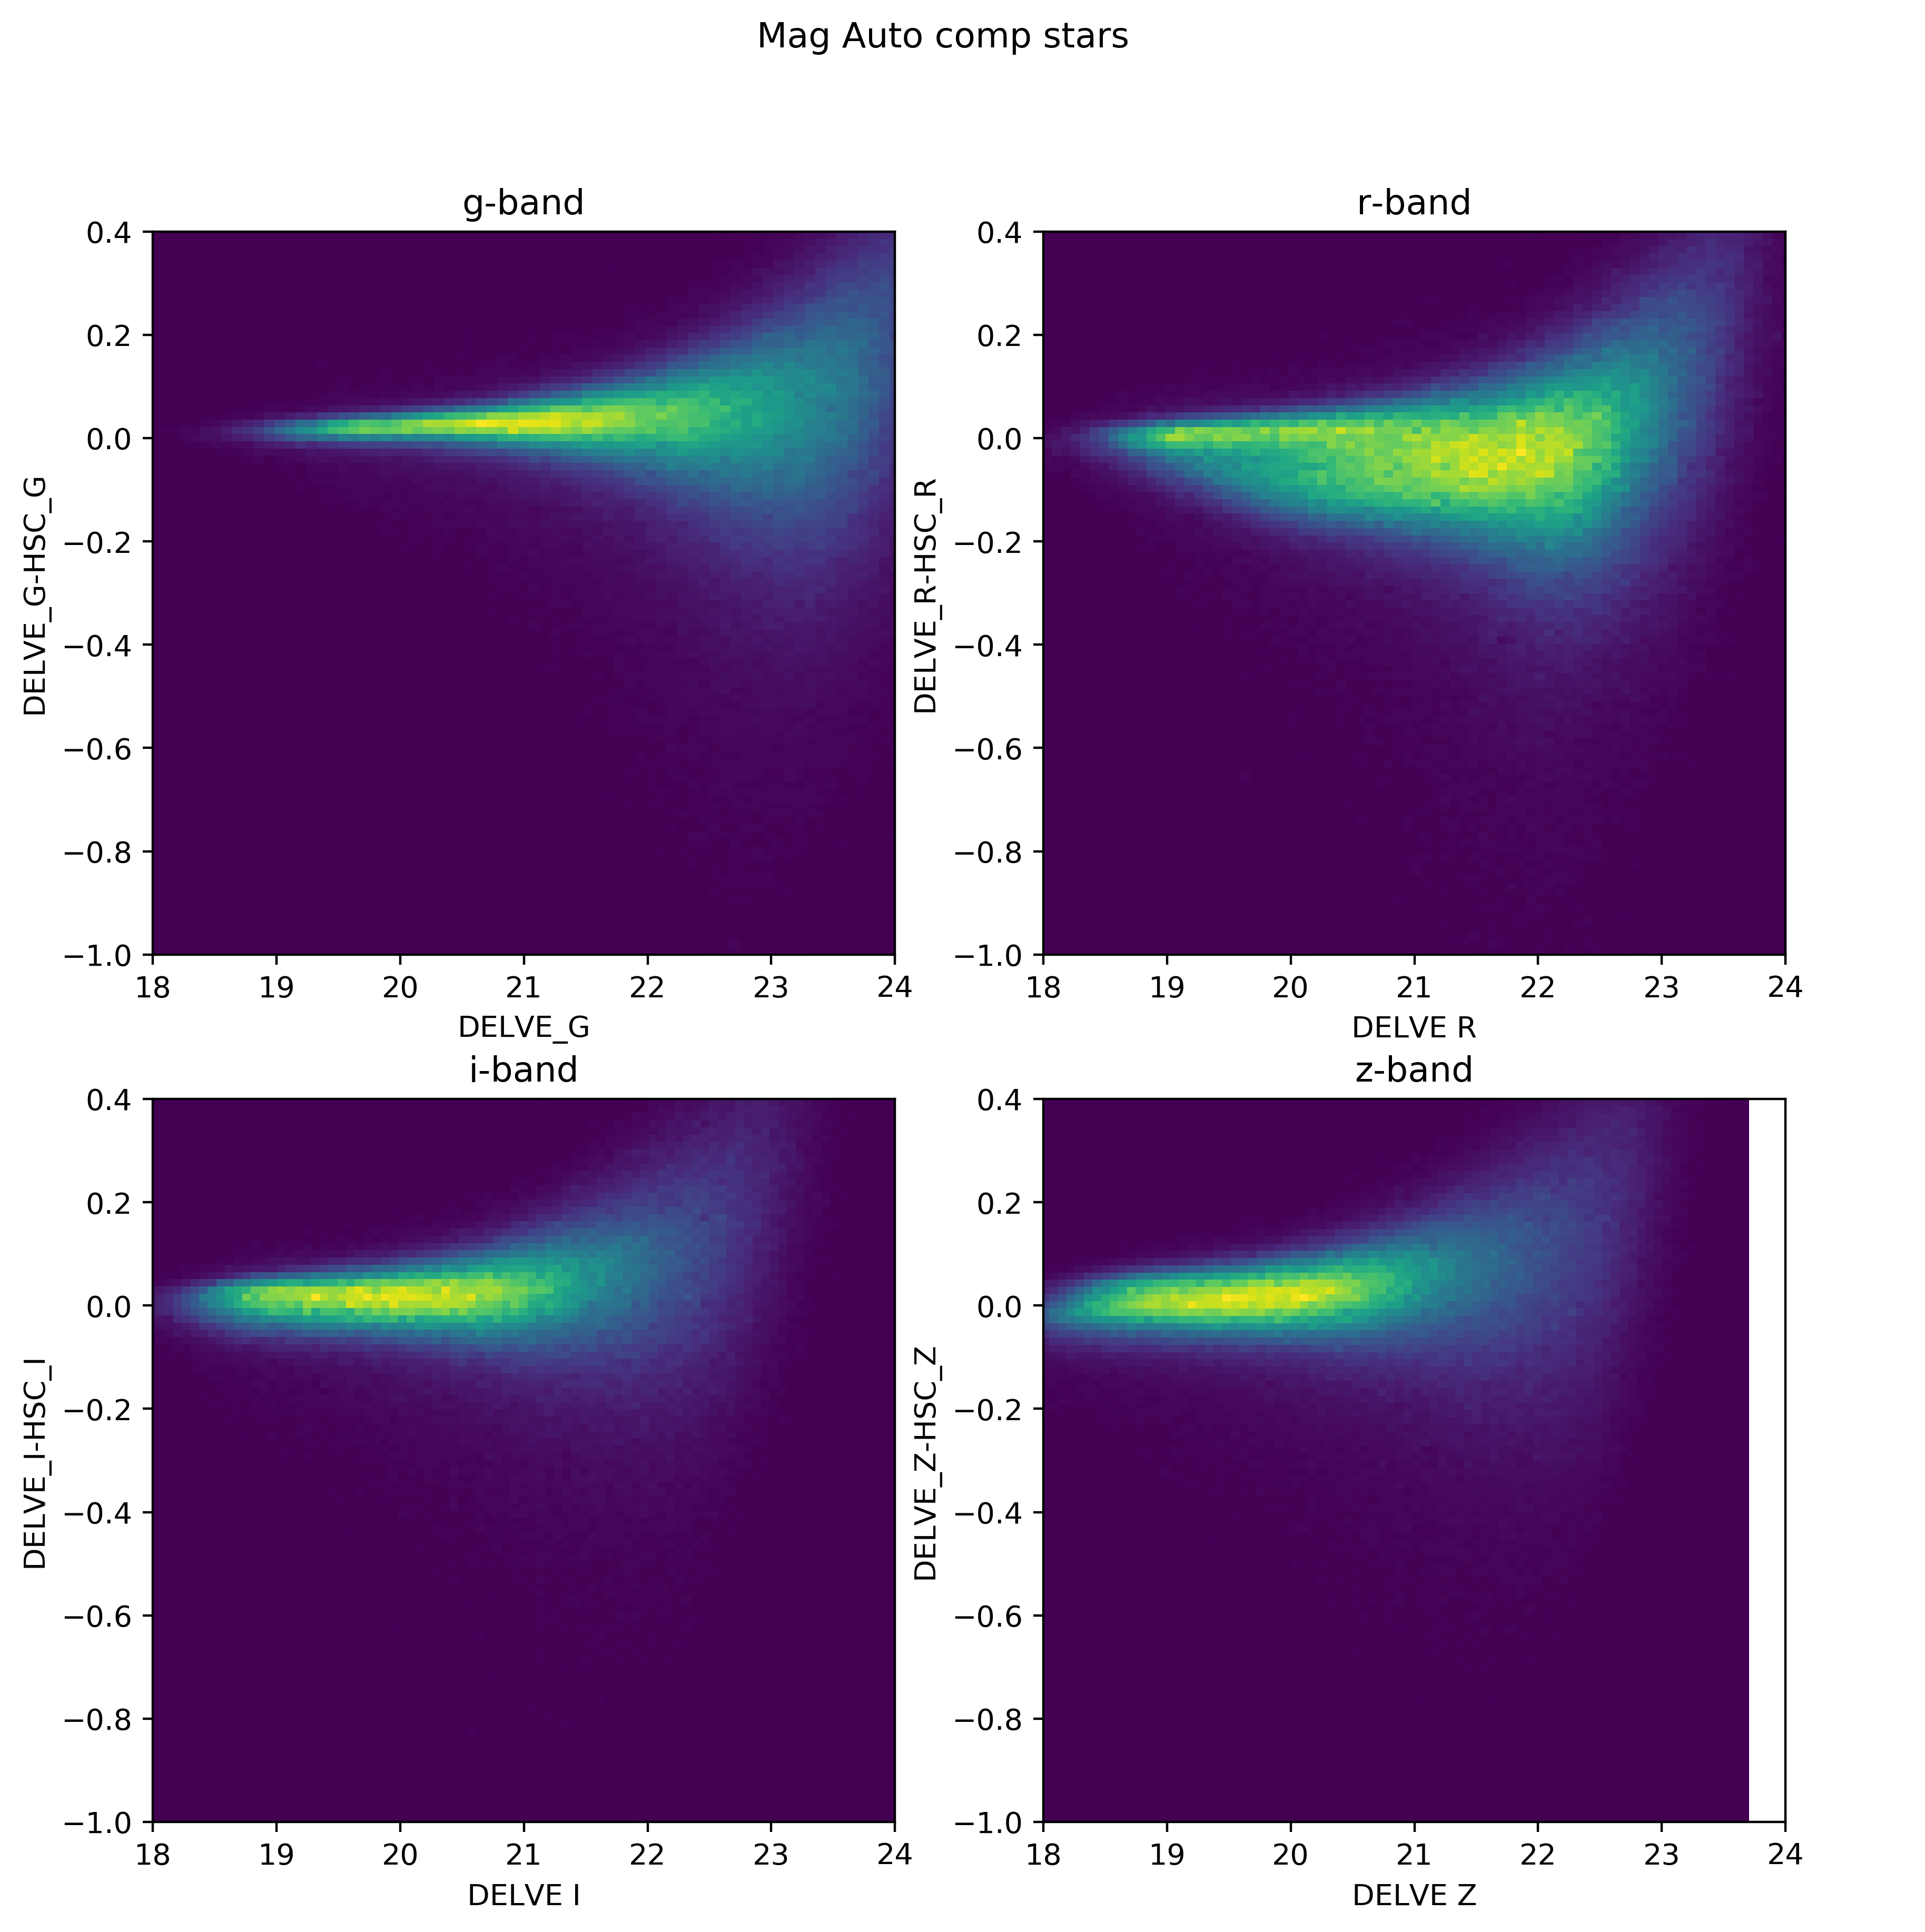

In [386]:
seldiffg  = (delve_match_cat["MAG_AUTO_G"]-hsc_match_cat["g_psfflux_mag"] < 0.4) 
seldiffg &= (delve_match_cat["MAG_AUTO_G"]-hsc_match_cat["g_psfflux_mag"] > -1)
seldiffg &= (hsc_match_cat["g_extendedness_value"]==0)
          
seldiffr  = (delve_match_cat["MAG_AUTO_R"]-hsc_match_cat["r_psfflux_mag"] < 0.4) 
seldiffr &= (delve_match_cat["MAG_AUTO_R"]-hsc_match_cat["r_psfflux_mag"] > -1)
seldiffr &= (hsc_match_cat["r_extendedness_value"]==0)

plt.figure(dpi=400, figsize=(10,10))
plt.suptitle("Mag Auto comp stars")
plt.subplot(221)
plt.title("g-band")
bit=plt.hist2d(delve_match_cat["MAG_AUTO_G"][seldiffg],
               delve_match_cat["MAG_AUTO_G"][seldiffg]-hsc_match_cat["g_psfflux_mag"][seldiffg],
               bins=100)
plt.xlim(18,24)
plt.ylim(-1,0.4)
plt.xlabel("DELVE_G")
plt.ylabel("DELVE_G-HSC_G")
plt.subplot(222)
plt.title("r-band")
plt.hist2d(delve_match_cat["MAG_AUTO_R"][seldiffr],
           delve_match_cat["MAG_AUTO_R"][seldiffr]-hsc_match_cat["r_psfflux_mag"][seldiffr],
           bins=100)
plt.xlim(18,24)
plt.ylim(-1,0.4)
plt.xlabel("DELVE R")
plt.ylabel("DELVE_R-HSC_R")

seldiffi  = (delve_match_cat["MAG_AUTO_I"]-hsc_match_cat["i_psfflux_mag"] < 0.4) 
seldiffi &= (delve_match_cat["MAG_AUTO_I"]-hsc_match_cat["i_psfflux_mag"] > -1)
seldiffi &= (hsc_match_cat["i_extendedness_value"]==0)
plt.subplot(223)
plt.title("i-band")
plt.hist2d(delve_match_cat["MAG_AUTO_I"][seldiffi],
           delve_match_cat["MAG_AUTO_I"][seldiffi]-hsc_match_cat["i_psfflux_mag"][seldiffi],
           bins=100)
plt.xlim(18,24)
plt.ylim(-1,0.4)
plt.xlabel("DELVE I")
plt.ylabel("DELVE_I-HSC_I")


seldiffz  = (delve_match_cat["MAG_AUTO_Z"]-hsc_match_cat["z_psfflux_mag"] < 0.4) 
seldiffz &= (delve_match_cat["MAG_AUTO_Z"]-hsc_match_cat["z_psfflux_mag"] > -1)
seldiffz &= (hsc_match_cat["z_extendedness_value"]==0)
plt.subplot(224)
plt.title("z-band")
plt.hist2d(delve_match_cat["MAG_AUTO_Z"][seldiffz],
           delve_match_cat["MAG_AUTO_Z"][seldiffz]-hsc_match_cat["z_psfflux_mag"][seldiffz],
           bins=100)
plt.xlim(18,24)
plt.ylim(-1,0.4)
plt.xlabel("DELVE Z")
plt.ylabel("DELVE_Z-HSC_Z")
plt.savefig("../plots/diff_stars_auto_comp.png")

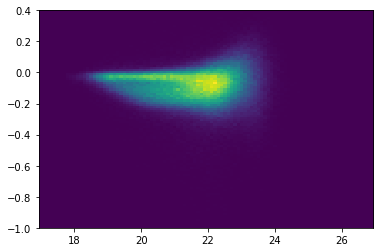

In [276]:
bit=plt.hist2d(delve_match_cat["MAG_AUTO_R"][seldiffr],
           delve_match_cat["MAG_PSF_R"][seldiffr]-hsc_match_cat["r_psfflux_mag"][seldiffr],
           bins=100)

In [391]:
plt.figure(dpi=400, figsize=(10,5))
plt.suptitle("Stellar Sources in hsc")
plt.subplot(121)
plt.title("DELVE")
bit=plt.hist2d(delve_match_cat["MAG_PSF_G"][sel_star_hsc]-delve_match_cat["MAG_PSF_I"][sel_star_hsc],
               delve_match_cat["MAG_PSF_G"][sel_star_hsc],bins=400)
plt.ylim(25,19)
plt.xlim(-0.1,2)
plt.xlabel("g-i")
plt.ylabel("g")
plt.subplot(122)
plt.title("HSC DR2")
plt.hist2d(hsc_match_cat["g_psfflux_mag"][sel_star_hsc]-hsc_match_cat["i_psfflux_mag"][sel_star_hsc],
           hsc_match_cat["g_psfflux_mag"][sel_star_hsc],bins=bit[1:3])
plt.ylim(25,19)
plt.xlim(-0.1,2)
plt.xlabel("g-i")
plt.ylabel("g")

plt.savefig("../plots/gi_cmd_other_star_comp_hsc.png")

In [10]:
sel_star_hsc=(hsc_match_cat["g_extendedness_value"]==0) & (hsc_match_cat["i_extendedness_value"]==0)

NameError: name 'hsc_match_cat' is not defined

349192


349192


Text(0,0.5,'g')

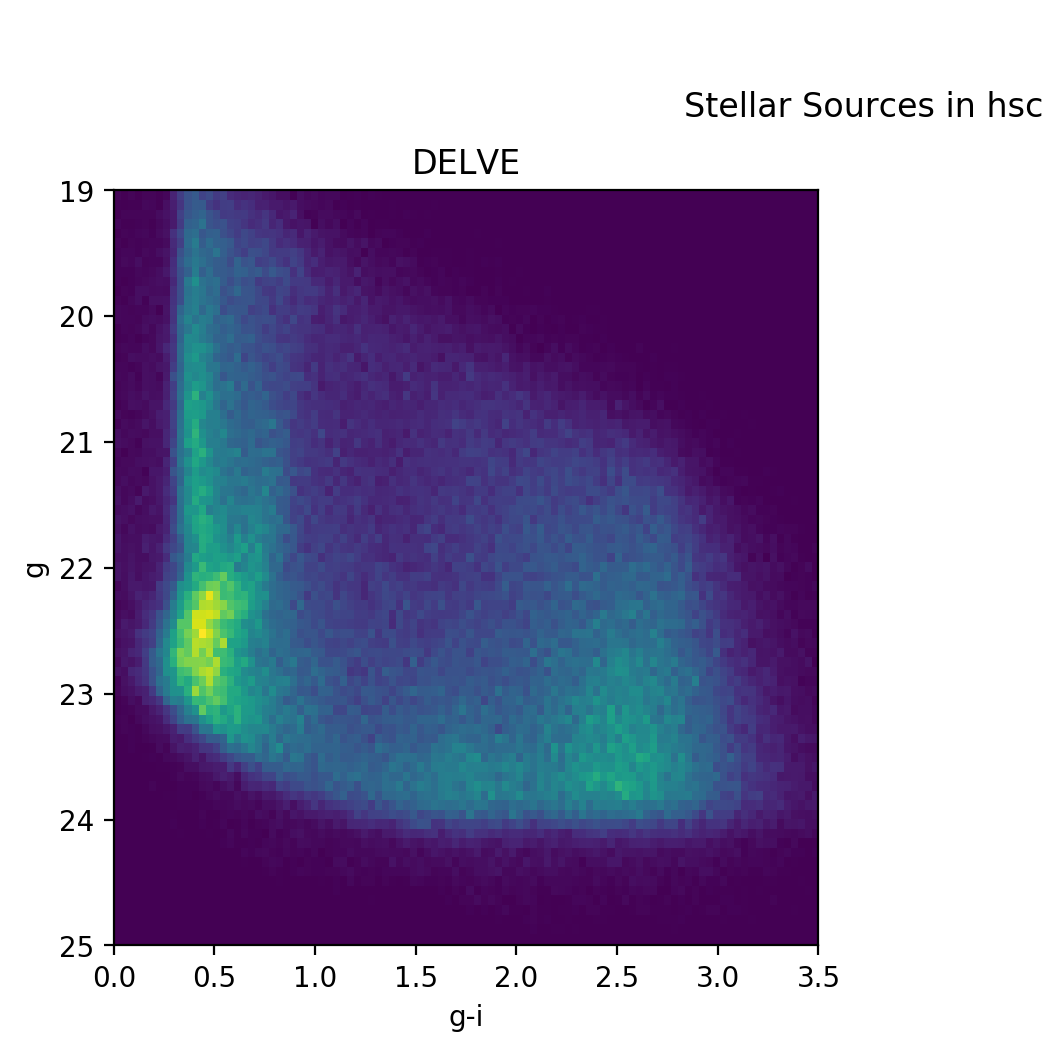

In [42]:
star=sel_star_hsc
sel = (delve_match_cat["MAG_PSF_I"] < 30) & star
sel &=(delve_match_cat["MAG_PSF_G"]-delve_match_cat["MAG_PSF_I"] > 0) & (delve_match_cat["MAG_PSF_G"]-delve_match_cat["MAG_PSF_I"] < 3.5)
mag_delve=delve_match_cat["MAG_PSF_G"][sel]
print(len(mag_delve))
color_delve=delve_match_cat["MAG_PSF_G"][sel]-delve_match_cat["MAG_PSF_I"][sel]
mag_hsc=2
color_hsc=2
plt.figure(dpi=200, figsize=(10,5))
plt.suptitle("Stellar Sources in hsc")
plt.subplot(121)
plt.title("DELVE")

bit=plt.hist2d(color_delve,mag_delve,bins=100)
               
plt.ylim(25,19)
#plt.xlim(-0.1,4)
plt.xlabel("g-i")
plt.ylabel("g")
# plt.subplot(122)
# plt.title("HSC DR2")
# plt.hist2d(hsc_match_cat["g_psfflux_mag"][sel_star_hsc]-hsc_match_cat["i_psfflux_mag"][sel_star_hsc],
#            hsc_match_cat["g_psfflux_mag"][sel_star_hsc],bins=bit[1:3])
# plt.ylim(25,19)
# plt.xlim(-0.1,2)
# plt.xlabel("g-i")
# plt.ylabel("g")

#plt.savefig("../plots/gi_cmd_other_star_comp_hsc.png")

Text(0,0.5,'delta dec')

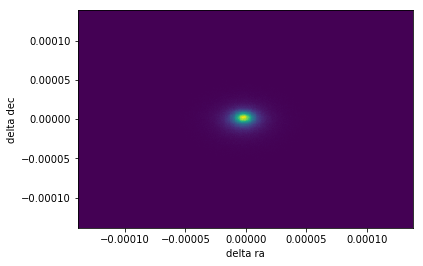

In [192]:
bit=plt.hist2d(delve_match_cat["RA"]-hsc_match_cat["ra"],
               delve_match_cat["DEC"]-hsc_match_cat["dec"],bins=400)
plt.xlabel("delta ra")
plt.ylabel("delta dec")

In [ ]:

plt.figure(dpi=400, figsize=(10,5))
plt.suptitle("All sources")
plt.subplot(121)
plt.title("DELVE")
bit=plt.hist2d(delve_match_cat["MAG_PSF_G"]-delve_match_cat["MAG_PSF_R"],delve_match_cat["MAG_PSF_G"],bins=400)
plt.ylim(25,19)
plt.xlim(-0.1,2)
plt.xlabel("g-r")
plt.ylabel("g")
plt.subplot(122)
plt.title("HSC DR2")
plt.hist2d(hsc_match_cat["g_psfflux_mag"]-hsc_match_cat["r_psfflux_mag"],hsc_match_cat["g_psfflux_mag"],bins=bit[1:3])
plt.ylim(25,19)
plt.xlim(-0.1,2)
plt.xlabel("g-r")
plt.ylabel("g")
plt.savefig("../plots/cmd_all_comp.png")

In [157]:
delvestar=np.zeros_like(delve_match_cat["RA"])
delvestar[sel_star_delve==False]=1

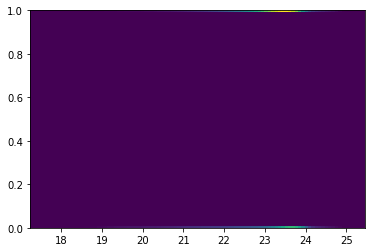

In [160]:
bit=plt.hist2d(delve_match_cat["MAG_PSF_G"],delvestar, bins=100)#- hsc_match_cat["g_extendedness_value"])

In [144]:
delvestar

array([1., 1., 1., ..., 1., 1., 0.])

In [30]:
magbins=np.arange(18,25,0.2)

In [52]:
def completeness_rate(bins=magbins, band="G"):
    # in mag bin
    bincent=(bins[1:]+bins[:-1])/2
    fp1=[]
    fp2=[]
    cp1=[]
    cp2=[]
    mgpsf_mean=[]
    mgpsf_sd=[]
    mgauto_mean=[]
    mgauto_sd=[]
    binsize=[]
    star_ct=[]
    for i in range(len(bins)-1):
        subset_sel=(delve_match_cat["MAG_PSF_{}".format(band)] > bins[i]) & \
                   (delve_match_cat["MAG_PSF_{}".format(band)] < bins[i+1]) & (hsc_match_cat["{}_psfflux_mag".format(band.lower())] < 30)   
     
        subset_delve=delve_match_cat[subset_sel]
        subset_hsc=hsc_match_cat[subset_sel]
        # false positive delve_star=true,hsc=false
        ds1=abs(subset_delve["SPREAD_MODEL_{}".format(band)])-subset_delve["SPREADERR_MODEL_{}".format(band)]< 0.003
        ds2=(abs(subset_delve["SPREAD_MODEL_{}".format(band)]) < 0.003) #& (abs(subset_delve["SPREAD_MODEL_R"]) < 0.003) 
        binsize.append(
            len(subset_delve["RA"])
        )
        fp1.append(
                      len(subset_delve[(ds1==True) & 
                          (subset_hsc["{}_extendedness_value".format(band.lower())] !=0)& 
                          (subset_hsc["{}_extendedness_value".format(band.lower())] !=0)])
                  )
        fp2.append(
                      len(subset_delve[(ds2==True) & 
                          (subset_hsc["{}_extendedness_value".format(band.lower())] !=0)& 
                          (subset_hsc["{}_extendedness_value".format(band.lower())] !=0)])
                  )
        cp1.append(
                      len(subset_delve[(ds1==True) & 
                          (subset_hsc["{}_extendedness_value".format(band.lower())] ==0)& 
                          (subset_hsc["{}_extendedness_value".format(band.lower())] ==0)])
                  )
        cp2.append(
                      len(subset_delve[(ds2==True) & 
                          (subset_hsc["{}_extendedness_value".format(band.lower())] ==0)& 
                          (subset_hsc["{}_extendedness_value".format(band.lower())] ==0)])
                  )
        star_ct.append(len(subset_hsc[subset_hsc["{}_extendedness_value".format(band.lower())] ==0]))
        hsc_star=(subset_hsc["{}_extendedness_value".format(band.lower())] ==0)
        mgpsf_mean.append(
                        np.mean(subset_delve["MAG_PSF_{}".format(band)][hsc_star]-\
                             subset_hsc["{}_psfflux_mag".format(band.lower())][hsc_star])
                  )
        mgpsf_sd.append(
                        np.std(subset_delve["MAG_PSF_{}".format(band)][hsc_star]-\
                             subset_hsc["{}_psfflux_mag".format(band.lower())][hsc_star])
                  )
        mgauto_mean.append(
                        np.mean(subset_delve["MAG_AUTO_{}".format(band)][hsc_star]-\
                             subset_hsc["{}_psfflux_mag".format(band.lower())][hsc_star])
                  )
        mgauto_sd.append(
                        np.std(subset_delve["MAG_AUTO_{}".format(band)][hsc_star]-\
                             subset_hsc["{}_psfflux_mag".format(band.lower())][hsc_star])
                  )
        
        
    return pd.DataFrame({"mag_g":bincent,
                         "fp1":np.array(fp1),
                         "fp2":np.array(fp2),
                         "cp1":np.array(cp1),
                         "cp2":np.array(cp2),
                         "psf_diff_mean":np.array(mgpsf_mean),
                         "psf_diff_sd":np.array(mgpsf_sd),
                         "auto_diff_mean":np.array(mgauto_mean),
                         "auto_diff_sd":np.array(mgauto_sd),
                         "star_ct":np.array(star_ct),
                         "binsize":np.array(binsize)})

In [53]:
stargal_fr=completeness_rate(magbins,"G")


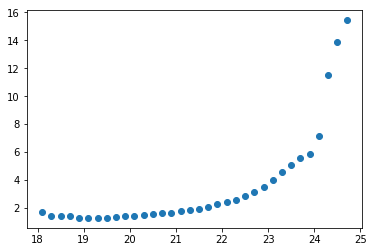

In [54]:
plt.plot(stargal_fr["mag_g"], stargal_fr["binsize"]/stargal_fr["star_ct"],"o", label="Completeness")

In [62]:
bands=["G","R","I","Z"]
for band in bands:
    stargal_fr=completeness_rate(magbins,band)
    fig, ax1 = plt.subplots(dpi=300)
    plt.title("Method 1: {}-Band only Stars".format(band.lower()))
    ax1.set_xlabel('Mag {}'.format(band.lower()))
    ax1.set_ylabel('Fraction')
    ax1.set_xlim(18,25)
    ax1.set_ylim(0,1.2)
    lns1=ax1.plot(stargal_fr["mag_g"], stargal_fr["fp1"]/stargal_fr["binsize"],"o", label="False Positive")
    lns2=ax1.plot(stargal_fr["mag_g"], stargal_fr["cp1"]/stargal_fr["star_ct"],"o", label="Completeness")

    #ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    #color = 'tab:blue'
    ax2.set_ylabel('Log sources')  # we already handled the x-label with ax1
    lns3=ax2.plot(stargal_fr["mag_g"], np.log10(stargal_fr["binsize"]), "o",label="N sources", c="tab:red")
    ax2.set_ylim(2,6.5)

    lns = lns1+lns2+lns3
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc=1, ncol=3)
    ax2.tick_params(axis='y', labelcolor="tab:red")

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.savefig("../plots/false_positive1_{}.png".format(band))
    plt.close()

/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/data/des81.b/data/pferguso/conda/envs/s

/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/data/des81.b/data/pferguso/conda/envs/s

/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/home/s1/pferguso/.conda/envs/streams/lib/python2.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/s1/pferguso/.conda/envs/streams/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/s1/pferguso/.conda/envs/streams/lib/python2.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/s1/pferguso/.conda/envs/streams/lib/python2.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/s1/pferguso/.conda/envs/streams/lib/python2.7/site-packages/numpy/core/_methods.

In [67]:
bands=["G","R","I","Z"]
for band in bands:
    stargal_fr=completeness_rate(magbins,band)
    fig, ax1 = plt.subplots(dpi=300)
    plt.title("Method comp: {}-Band only Stars".format(band.lower()))
    ax1.set_xlabel('Mag {}'.format(band.lower()))
    ax1.set_ylabel('Fraction')
    ax1.set_xlim(18,25)
    ax1.set_ylim(0.9,3)
    lns1=ax1.plot(stargal_fr["mag_g"], stargal_fr["fp1"]/stargal_fr["fp2"],"o", label="False Positive M1/M2")
    lns2=ax1.plot(stargal_fr["mag_g"], stargal_fr["cp1"]/stargal_fr["cp2"],"o", label="Completeness M1/M2")

    #ax1.tick_params(axis='y', labelcolor=color)

#     ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#     #color = 'tab:blue'
#     ax2.set_ylabel('Log sources')  # we already handled the x-label with ax1
#     lns3=ax2.plot(stargal_fr["mag_g"], np.log10(stargal_fr["binsize"]), "o",label="N sources", c="tab:red")
#     ax2.set_ylim(2,6.5)

    lns = lns1+lns2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc=1, ncol=3)
    #ax2.tick_params(axis='y', labelcolor="tab:red")

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.savefig("../plots/false_positive_mcomp_{}.png".format(band))
    plt.close()

/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/data/des81.b/data/pferguso/conda/envs/s

/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/home/s1/pferguso/.conda/envs/streams/lib/python2.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/s1/pferguso/.conda/envs/streams/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/s1/pferguso/.conda/envs/streams/lib/python2.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/s1/pferguso/.conda/envs/streams/lib/python2.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/s1/pferguso/.conda/envs/streams/lib/python2.7/site-packages/numpy/core/_methods.

/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/home/s1/pferguso/.conda/envs/streams/li

/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/home/s1/pferguso/.conda/envs/streams/lib/python2.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/s1/pferguso/.conda/envs/streams/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/s1/pferguso/.conda/envs/streams/lib/python2.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/s1/pferguso/.conda/envs/streams/lib/python2.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/s1/pferguso/.conda/envs/streams/lib/python2.7/site-packages/numpy/core/_methods.

In [308]:
stargal_fr=completeness_rate(magbins,"R")

/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/i

/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  
/home/s1/pferguso/.conda/envs/streams/lib/python2.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/s1/pferguso/.conda/envs/streams/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/s1/pferguso/.conda/envs/streams/lib/python2.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/s1/pferguso/.conda/envs/streams/lib/python2.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/s1/pferguso/.conda/envs/streams/lib/python2.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value 

/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  
/home/s1/pferguso/.conda/envs/streams/lib/python2.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/s1/pferguso/.conda/envs/streams/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/s1/pferguso/.conda/envs/streams/lib/python2.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/s1/pferguso/.conda/envs/streams/lib/python2.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/s1/pferguso/.conda/envs/streams/lib/python2.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value 

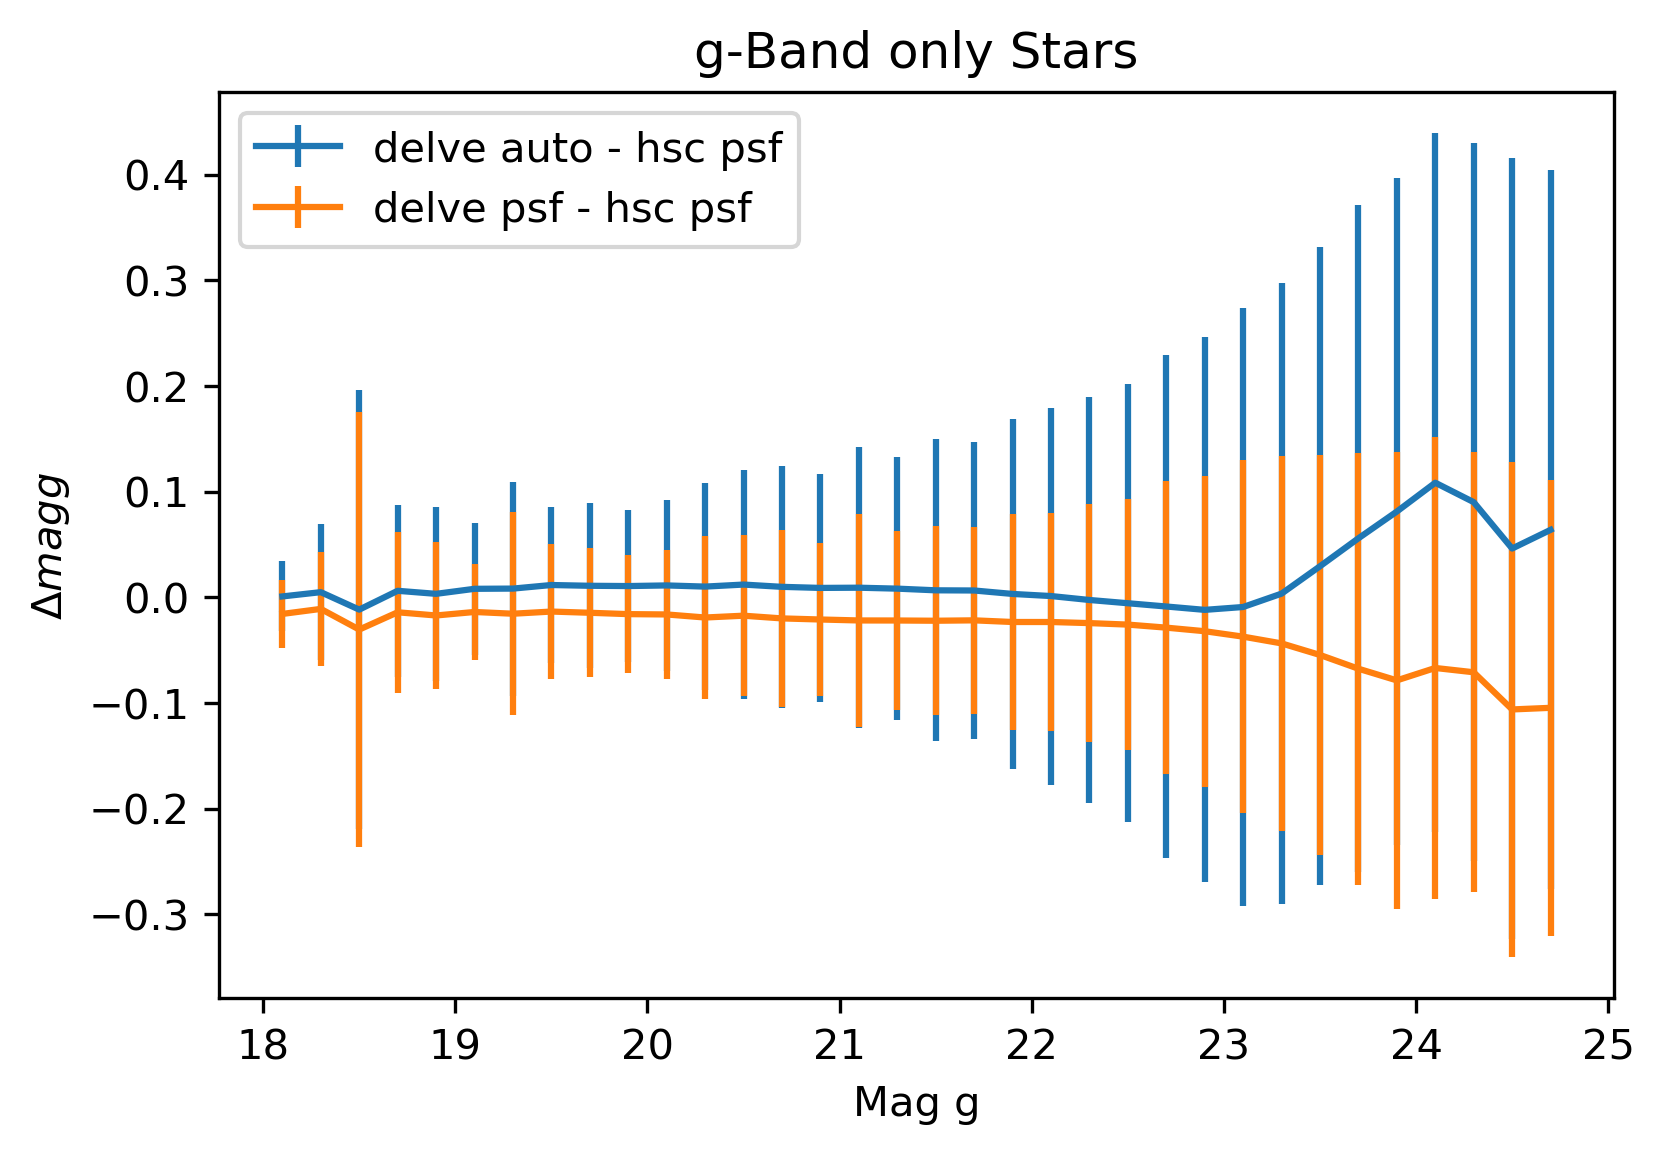

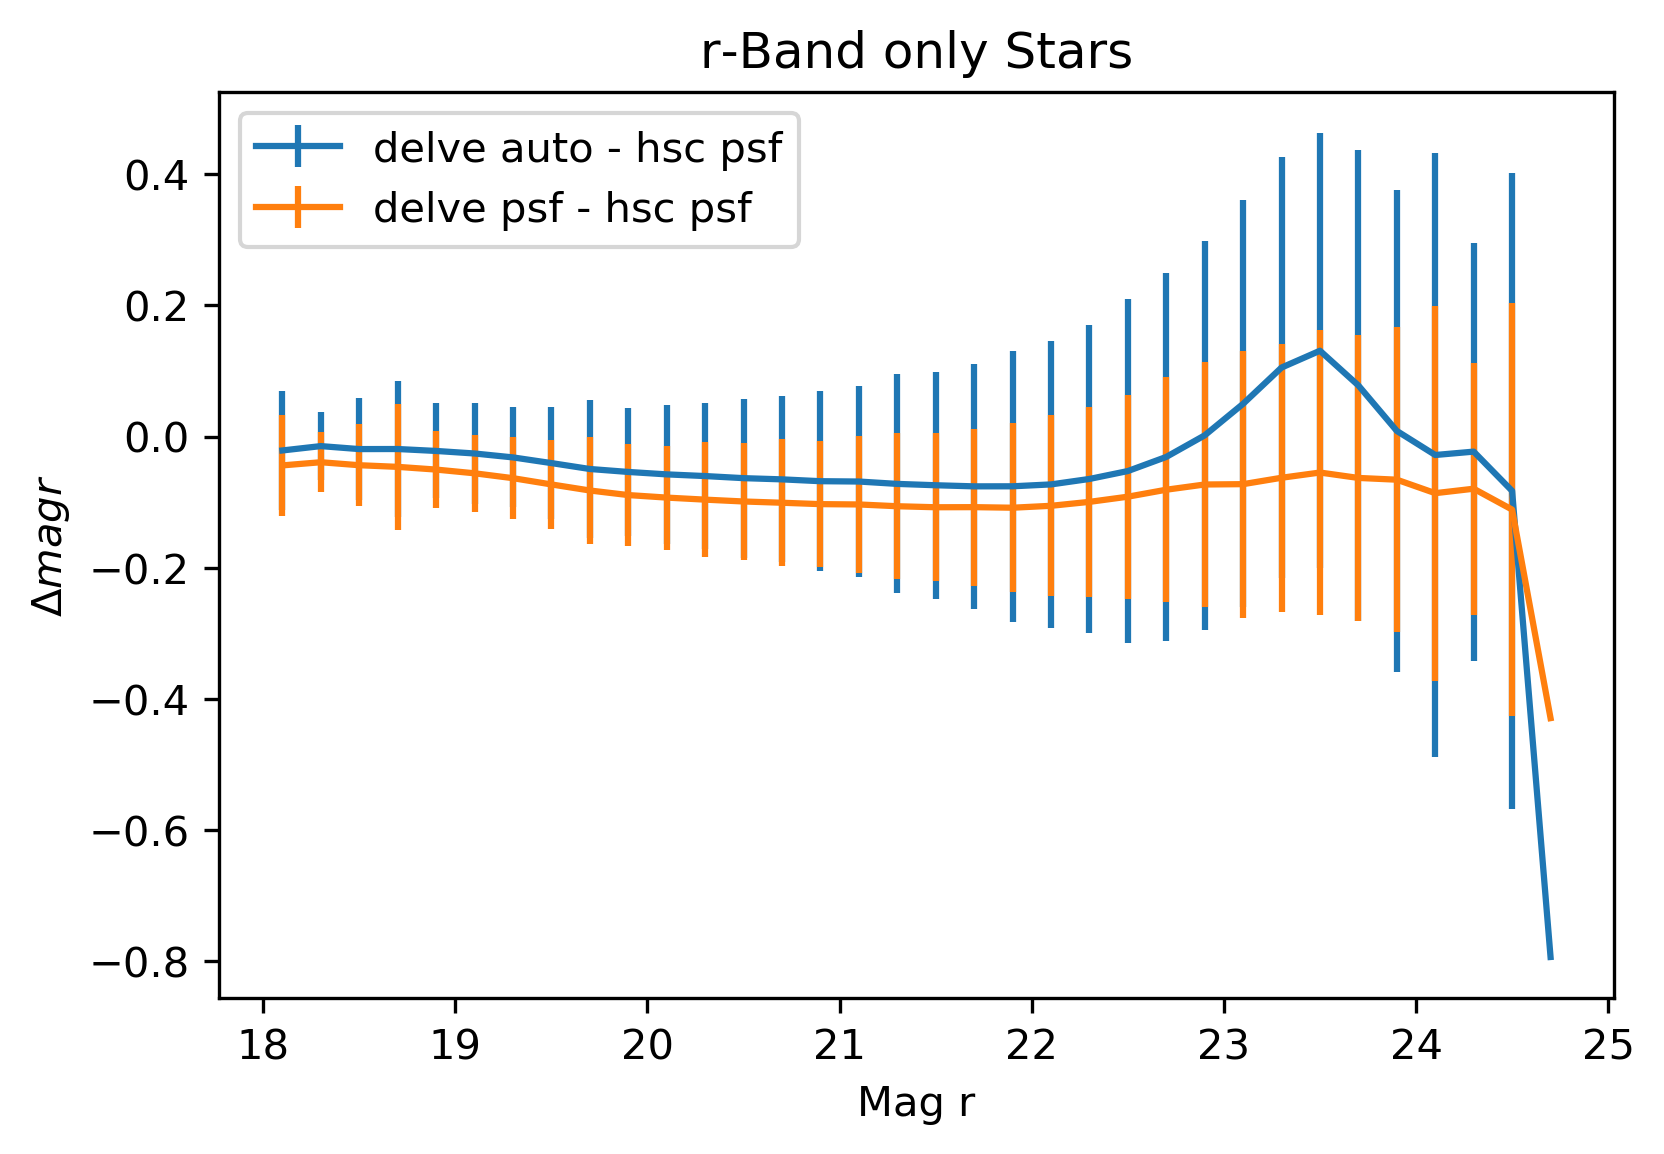

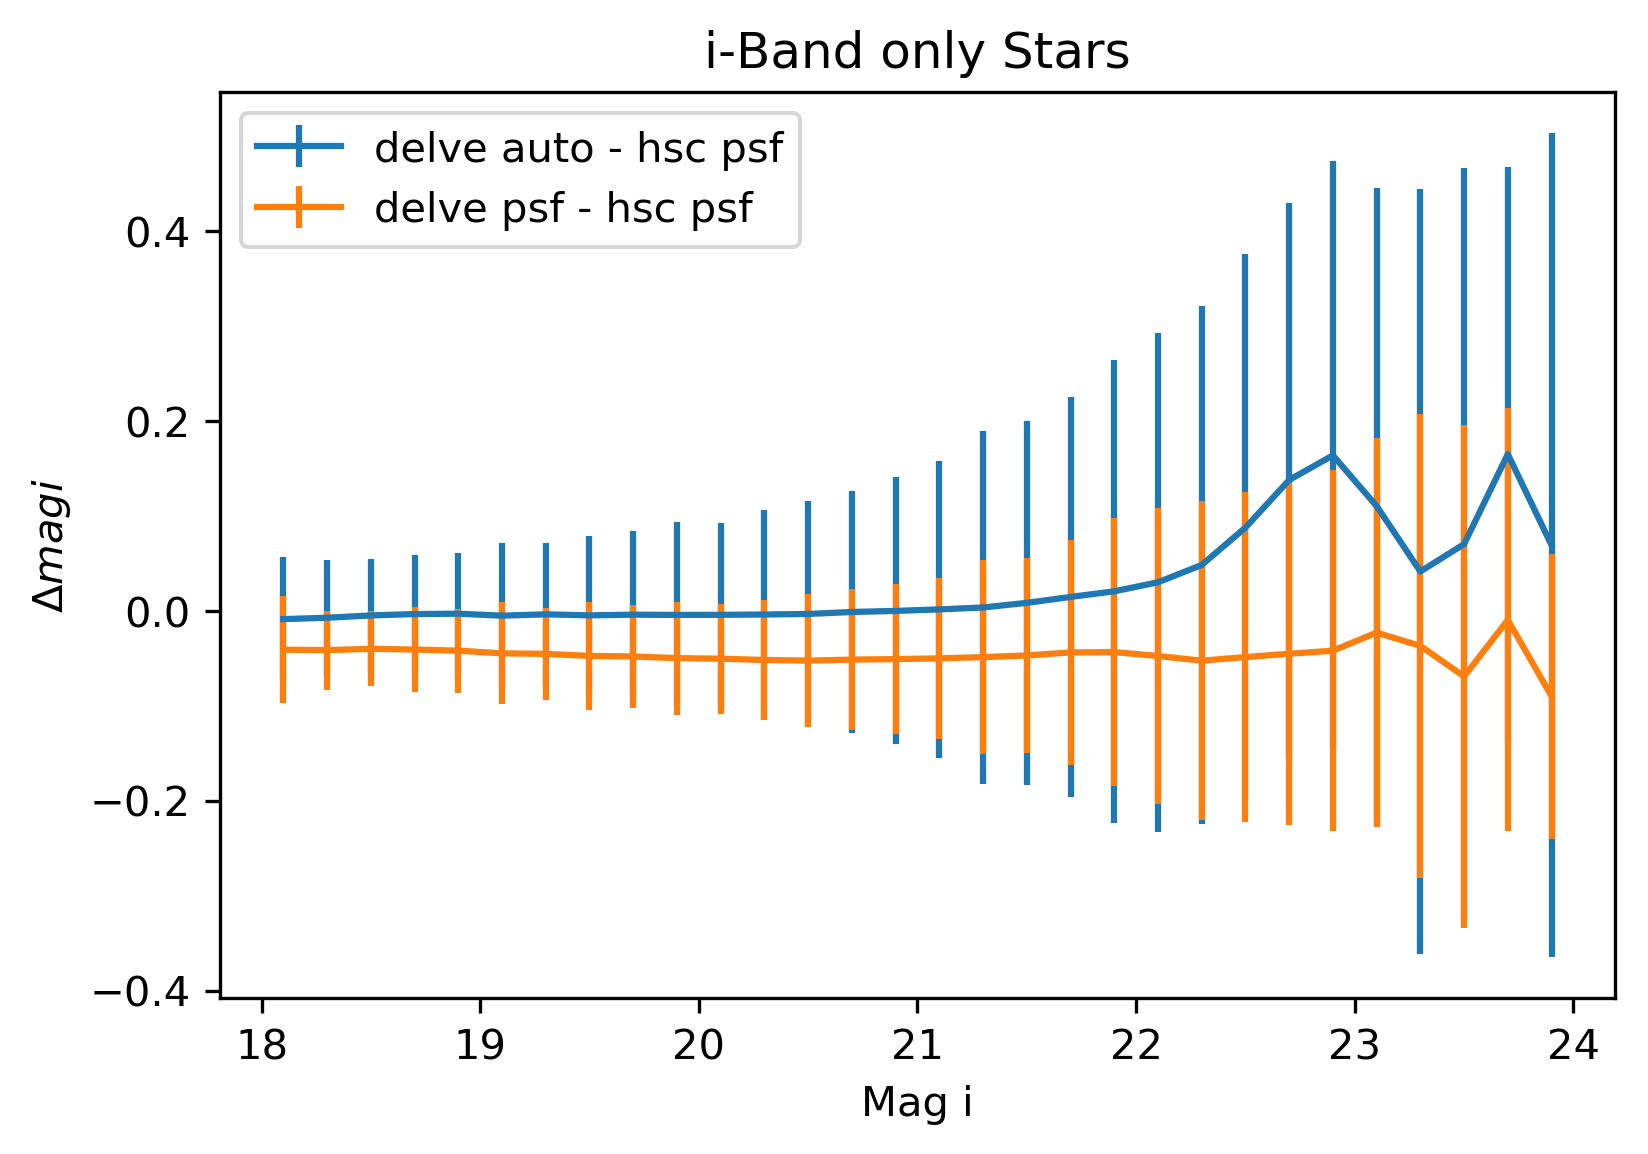

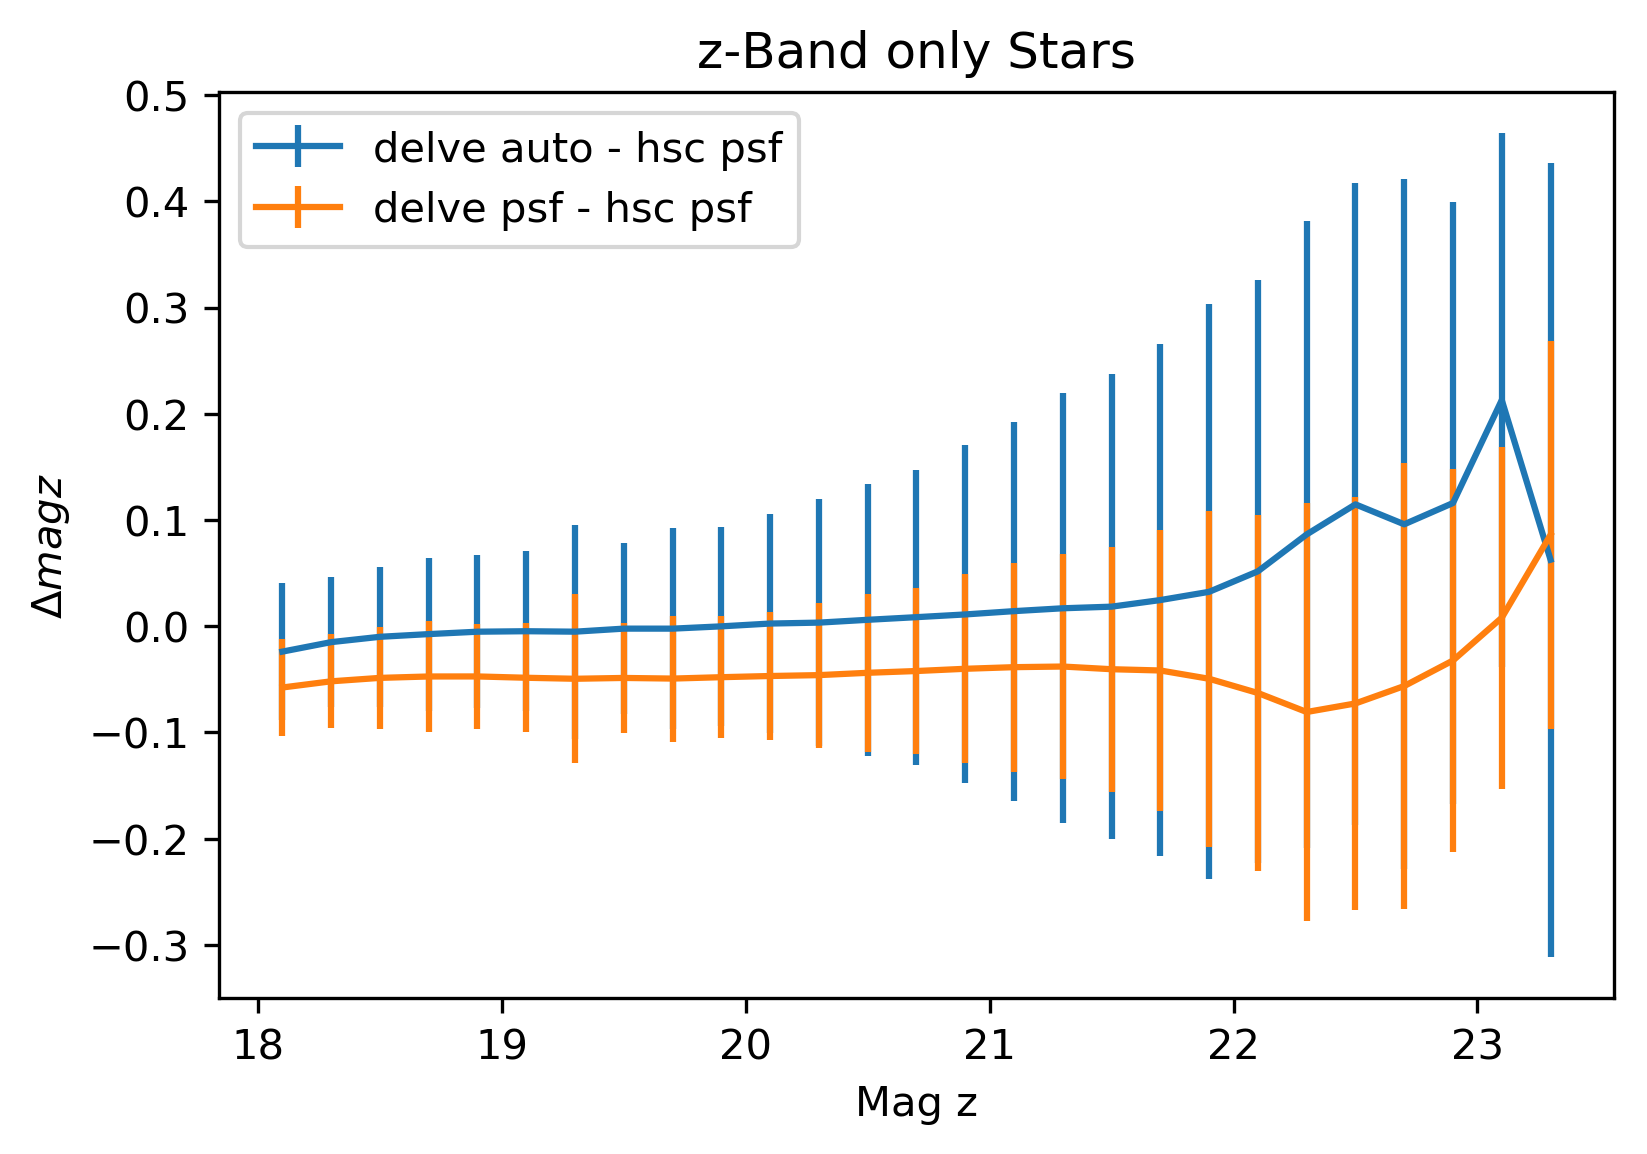

In [383]:
bands=["G","R","I","Z"]
for band in bands:
    stargal_fr=completeness_rate(magbins,band)
    fig, ax1 = plt.subplots(dpi=300)
    plt.title("{}-Band only Stars".format(band.lower()))
    plt.xlabel('Mag {}'.format(band.lower()))
    plt.ylabel('$\Delta mag {}$'.format(band.lower()))
    #plt.scatter(stargal_fr["mag_g"],stargal_fr["psf_diff_mean"])
    plt.errorbar(stargal_fr["mag_g"],stargal_fr["auto_diff_mean"],yerr=stargal_fr["auto_diff_sd"],label="delve auto - hsc psf")
    plt.errorbar(stargal_fr["mag_g"],stargal_fr["psf_diff_mean"],yerr=stargal_fr["psf_diff_sd"], label="delve psf - hsc psf")
    #plt.scatter(stargal_fr["mag_g"],stargal_fr["auto_diff_mean"])
    plt.legend(loc=2)
    plt.savefig("../plots/mag_comp_delve_hsc_{}.png".format(band))

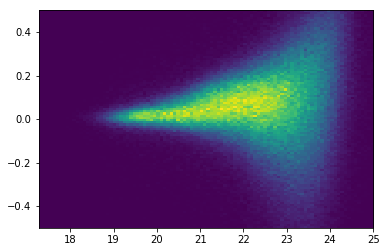

In [326]:
sel=(hsc_match_cat["g_extendedness_value"]==0) & (delve_match_cat["MAG_AUTO_G"] < 25)
gr_auto=delve_match_cat["MAG_AUTO_G"][sel]-delve_match_cat["MAG_AUTO_R"][sel]
gr_psf=delve_match_cat["MAG_PSF_G"][sel]-delve_match_cat["MAG_PSF_R"][sel]
gr_hsc=hsc_match_cat["g_psfflux_mag"][sel]-hsc_match_cat["r_psfflux_mag"][sel]
gmag_auto=delve_match_cat["MAG_AUTO_G"][sel]
diff=gr_psf[abs(gr_hsc-gr_psf) <0.5]-gr_hsc[abs(gr_hsc-gr_psf) <0.5]
diff=gr_auto[abs(gr_hsc-gr_auto) <0.5]-gr_hsc[abs(gr_hsc-gr_auto) <0.5]
bit=plt.hist2d(gmag_auto[abs(gr_hsc-gr_auto) <0.5],diff 
           ,bins=100)

In [372]:
def color_comp(bins=magbins, band1="G", band2="R"):
    # in mag bin
    bincent=(bins[1:]+bins[:-1])/2
    grpsf_mean=[]
    grpsf_sd=[]
    grauto_mean=[]
    grauto_sd=[]
    grpsf_diff_mean=[]
    grpsf_diff_sd=[]
    grauto_diff_mean=[]
    grauto_diff_sd=[]
    binsize=[]
    for i in range(len(bins)-1):
        subset_sel=(delve_match_cat["MAG_PSF_{}".format(band1)] > bins[i]) & \
                   (delve_match_cat["MAG_PSF_{}".format(band1)] < bins[i+1])
        subset_sel&=(hsc_match_cat["{}_psfflux_mag".format(band1.lower())] < 30)
        subset_sel&=(hsc_match_cat["{}_psfflux_mag".format(band2.lower())] < 30)
        subset_sel&=(delve_match_cat["MAG_PSF_{}".format(band2)] < 30)
        subset_sel&=(delve_match_cat["MAG_AUTO_{}".format(band2)] < 30)
        
        subset_delve=delve_match_cat[subset_sel]
        subset_hsc=hsc_match_cat[subset_sel]
        # false positive delve_star=true,hsc=false
        ds1=abs(subset_delve["SPREAD_MODEL_{}".format(band1)])-subset_delve["SPREADERR_MODEL_{}".format(band1)]< 0.003
        ds2=(abs(subset_delve["SPREAD_MODEL_{}".format(band1)]) < 0.003) #& (abs(subset_delve["SPREAD_MODEL_R"]) < 0.003) 
        binsize.append(
            len(subset_delve["RA"])
        )
        
        hsc_star=(subset_hsc["{}_extendedness_value".format(band1.lower())] ==0)
        gr_auto=subset_delve["MAG_AUTO_{}".format(band1)][hsc_star]-subset_delve["MAG_AUTO_{}".format(band2)][hsc_star]
        gr_psf=subset_delve["MAG_PSF_{}".format(band1)][hsc_star]-subset_delve["MAG_PSF_{}".format(band2)][hsc_star]
        gr_hsc=subset_hsc["{}_psfflux_mag".format(band1.lower())][hsc_star]-subset_hsc["{}_psfflux_mag".format(band2.lower())][hsc_star]
        grpsf_mean.append(
                        np.mean(gr_psf)
                  )
        grpsf_sd.append(
                        np.std(gr_psf)
                  )
        grauto_mean.append(
                        np.mean(gr_auto)
                  )
        grauto_sd.append(
                        np.std(gr_auto)
                  )
        grpsf_diff_mean.append(
                        np.mean(gr_psf-gr_hsc)
                  )
        grpsf_diff_sd.append(
                        np.std(gr_psf-gr_hsc)
                  )
        grauto_diff_mean.append(
                        np.mean(gr_auto-gr_hsc)
                  )
        grauto_diff_sd.append(
                        np.std(gr_auto-gr_hsc)
                  )
        
        
    return pd.DataFrame({"mag_g":bincent,
                         
                         "gr_psf_mean":np.array(grpsf_mean),
                         "gr_psf_sd":np.array(grpsf_sd),
                         "gr_auto_mean":np.array(grauto_mean),
                         "gr_auto_sd":np.array(grauto_sd),
                         "gr_psf_diff_mean":np.array(grpsf_diff_mean),
                         "gr_psf_diff_sd":np.array(grpsf_diff_sd),
                         "gr_auto_diff_mean":np.array(grauto_diff_mean),
                         "gr_auto_diff_sd":np.array(grauto_diff_sd),
                         "binsize":np.array(binsize)})

In [373]:
grframe=color_comp(band1="G", band2="R")
giframe=color_comp(band1="G", band2="I")
gzframe=color_comp(band1="G", band2="Z")

/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:16: Runt

/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/data/des81.b/data/pferguso/conda/envs/streams/lib/python2.7/site-packages/ipykernel_launcher.py:16: Runt

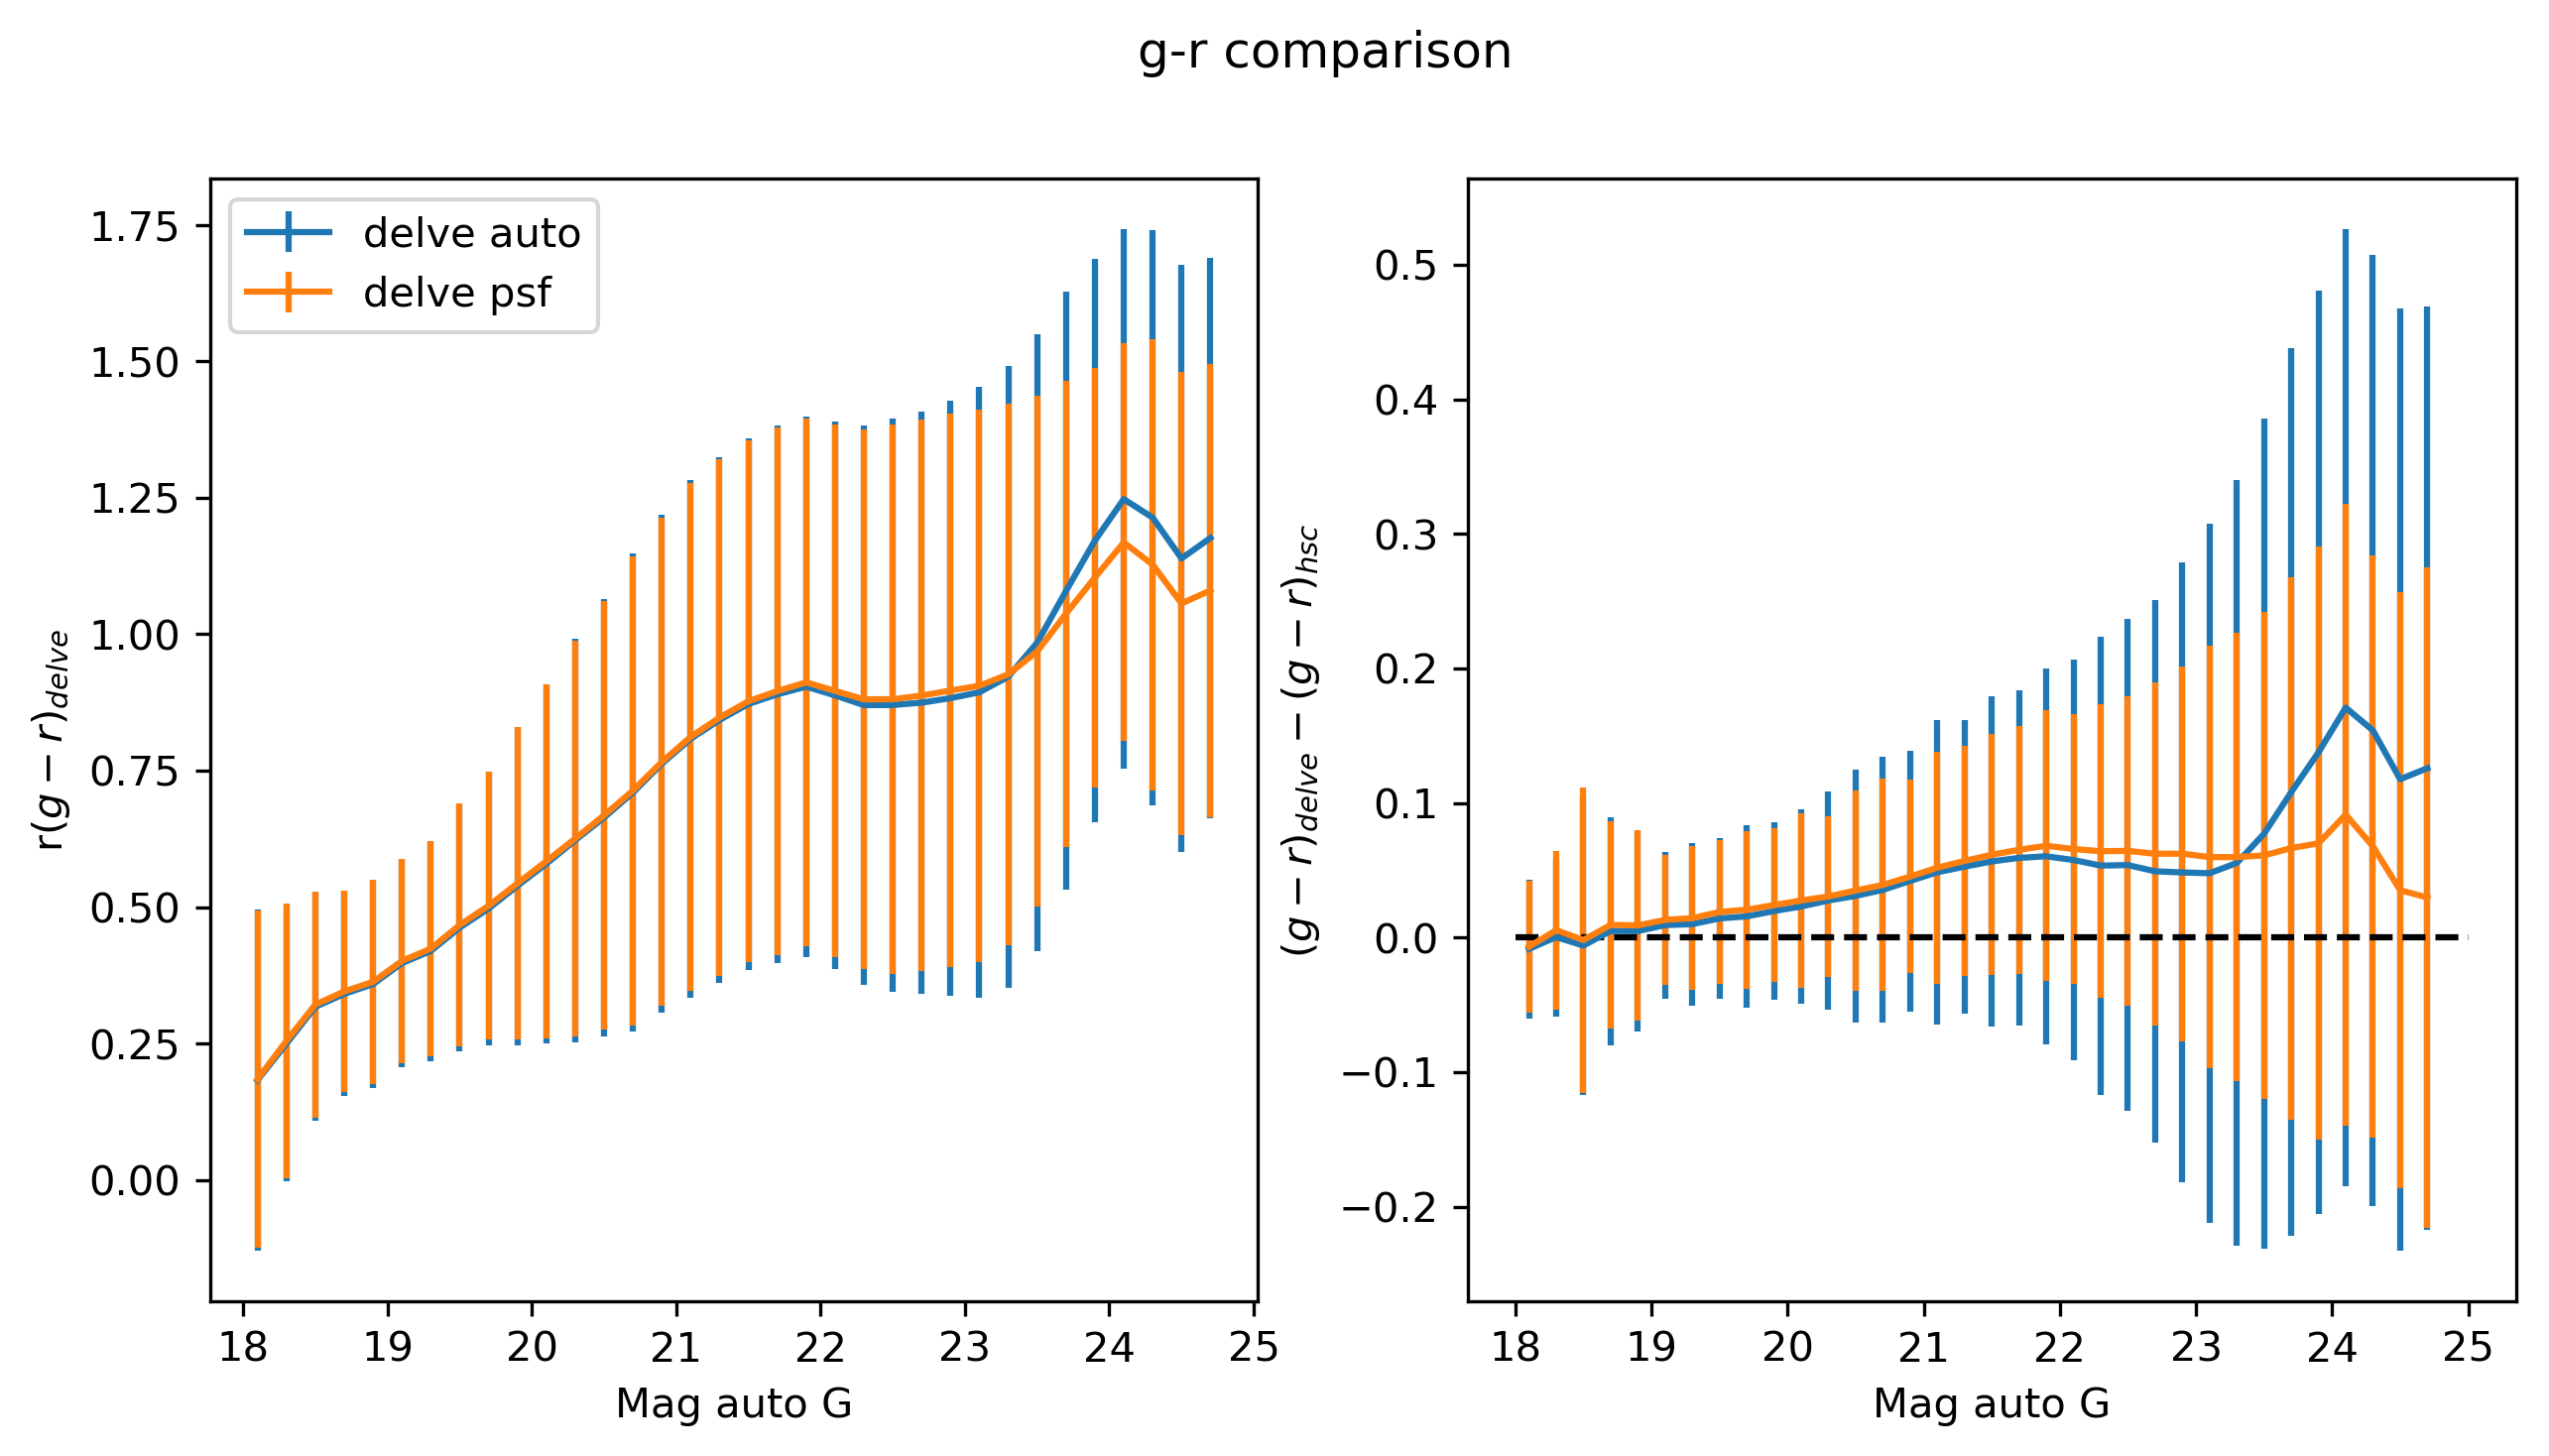

In [379]:
fig=plt.figure(dpi=300, figsize=(10,5))
plt.suptitle("g-r comparison")
plt.subplot(121)
#plt.scatter(stargal_fr["mag_g"],stargal_fr["psf_diff_mean"])
plt.errorbar(grframe["mag_g"],grframe["gr_auto_mean"],yerr=grframe["gr_auto_sd"], label="delve auto")
plt.errorbar(grframe["mag_g"],grframe["gr_psf_mean"],yerr=grframe["gr_psf_sd"],label="delve psf")


plt.xlabel("Mag auto G")
plt.ylabel("r$(g-r)_{delve}$")
#plt.scatter(stargal_fr["mag_g"],stargal_fr["auto_diff_mean"])
plt.legend(loc=2)
plt.subplot(122)
#plt.scatter(stargal_fr["mag_g"],stargal_fr["psf_diff_mean"])
plt.errorbar(grframe["mag_g"],grframe["gr_auto_diff_mean"],yerr=grframe["gr_auto_diff_sd"], label="delve auto")
plt.errorbar(grframe["mag_g"],grframe["gr_psf_diff_mean"],yerr=grframe["gr_psf_diff_sd"],label="delve psf")

plt.hlines(y=0,xmin=18,xmax=25, linestyle="--")
plt.xlabel("Mag auto G")
plt.ylabel("$(g-r)_{delve}-(g-r)_{hsc}$")
#plt.scatter(stargal_fr["mag_g"],stargal_fr["auto_diff_mean"])
#plt.legend(loc=2)
plt.savefig("../plots/gr_comp.png")

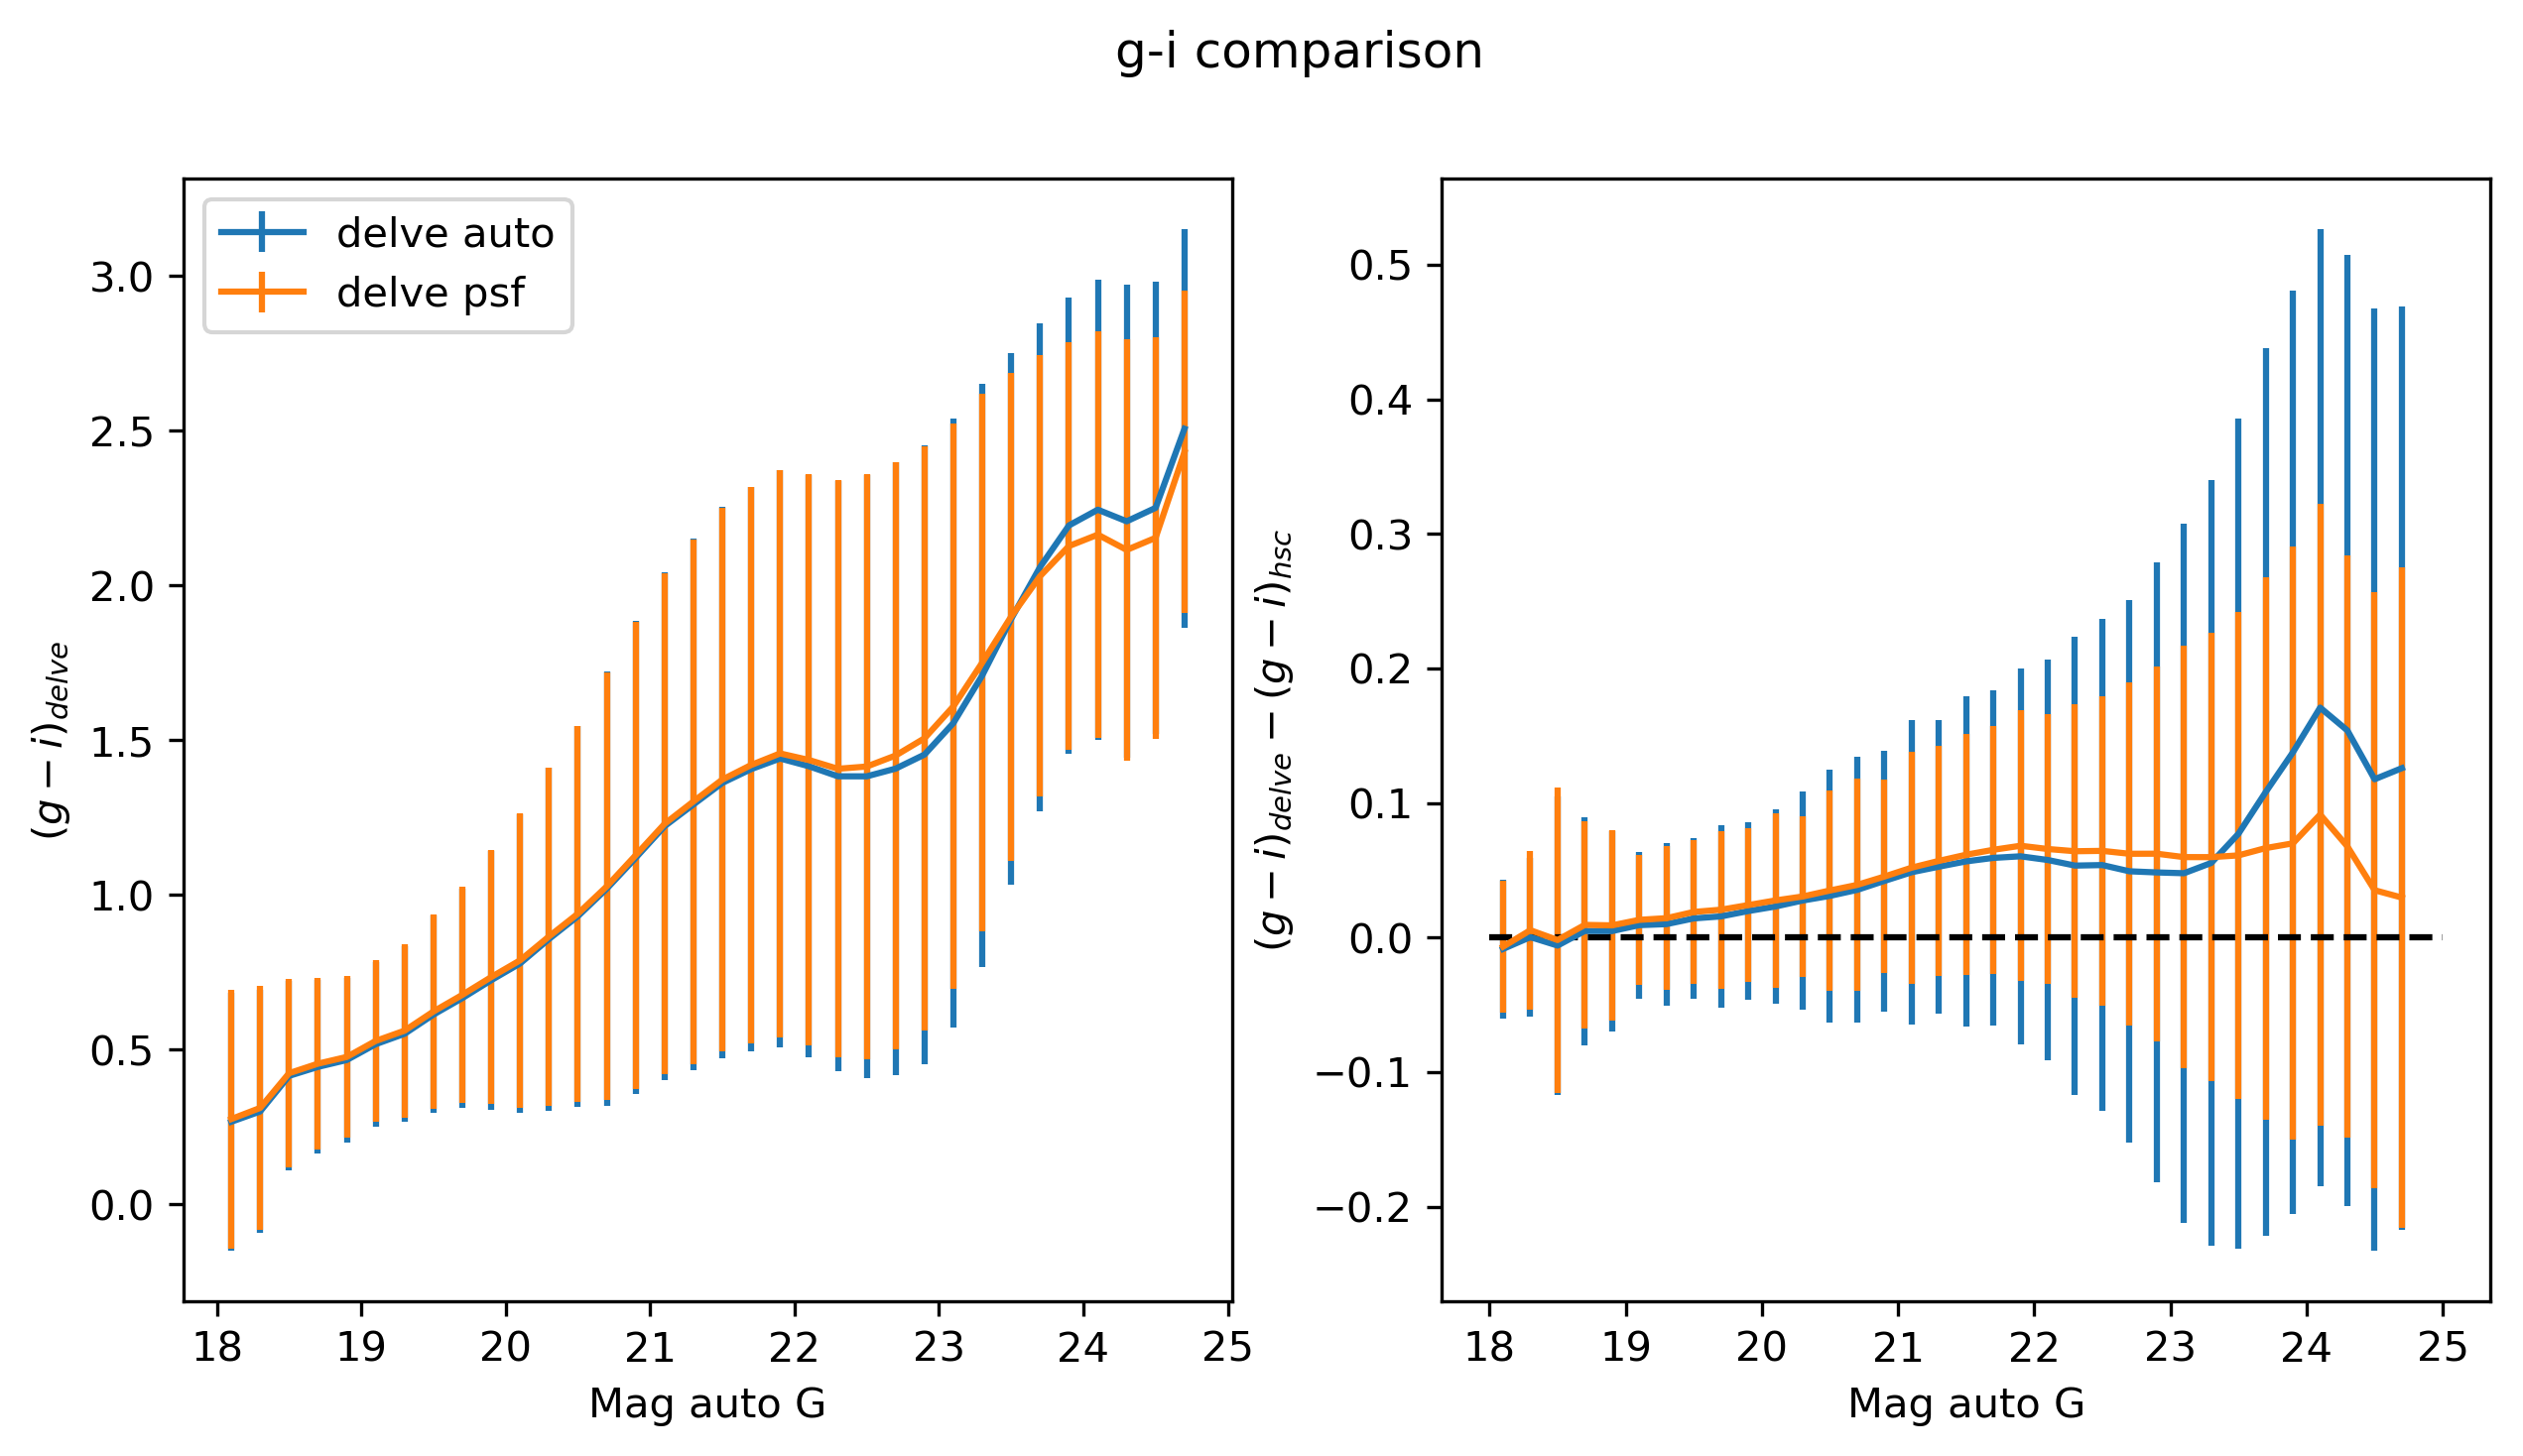

In [380]:
fig=plt.figure(dpi=300, figsize=(10,5))
plt.suptitle("g-i comparison")
plt.subplot(121)
#plt.scatter(stargal_fr["mag_g"],stargal_fr["psf_diff_mean"])
plt.errorbar(giframe["mag_g"],giframe["gr_auto_mean"],yerr=giframe["gr_auto_sd"], label="delve auto")
plt.errorbar(giframe["mag_g"],giframe["gr_psf_mean"],yerr=giframe["gr_psf_sd"],   label="delve psf")


plt.xlabel("Mag auto G")
plt.ylabel("$(g-i)_{delve}$")
#plt.scatter(stargal_fr["mag_g"],stargal_fr["auto_diff_mean"])
plt.legend(loc=2)
plt.subplot(122)
#plt.scatter(stargal_fr["mag_g"],stargal_fr["psf_diff_mean"])
plt.errorbar(grframe["mag_g"],grframe["gr_auto_diff_mean"],yerr=grframe["gr_auto_diff_sd"], label="delve auto")
plt.errorbar(grframe["mag_g"],grframe["gr_psf_diff_mean"],yerr=grframe["gr_psf_diff_sd"],label="delve psf")



plt.hlines(y=0,xmin=18,xmax=25, linestyle="--")
plt.xlabel("Mag auto G")
plt.ylabel(r"$(g-i)_{delve}-(g-i)_{hsc}$")
#plt.scatter(stargal_fr["mag_g"],stargal_fr["auto_diff_mean"])
#plt.legend(loc=2)
plt.savefig("../plots/gi_comp.png")

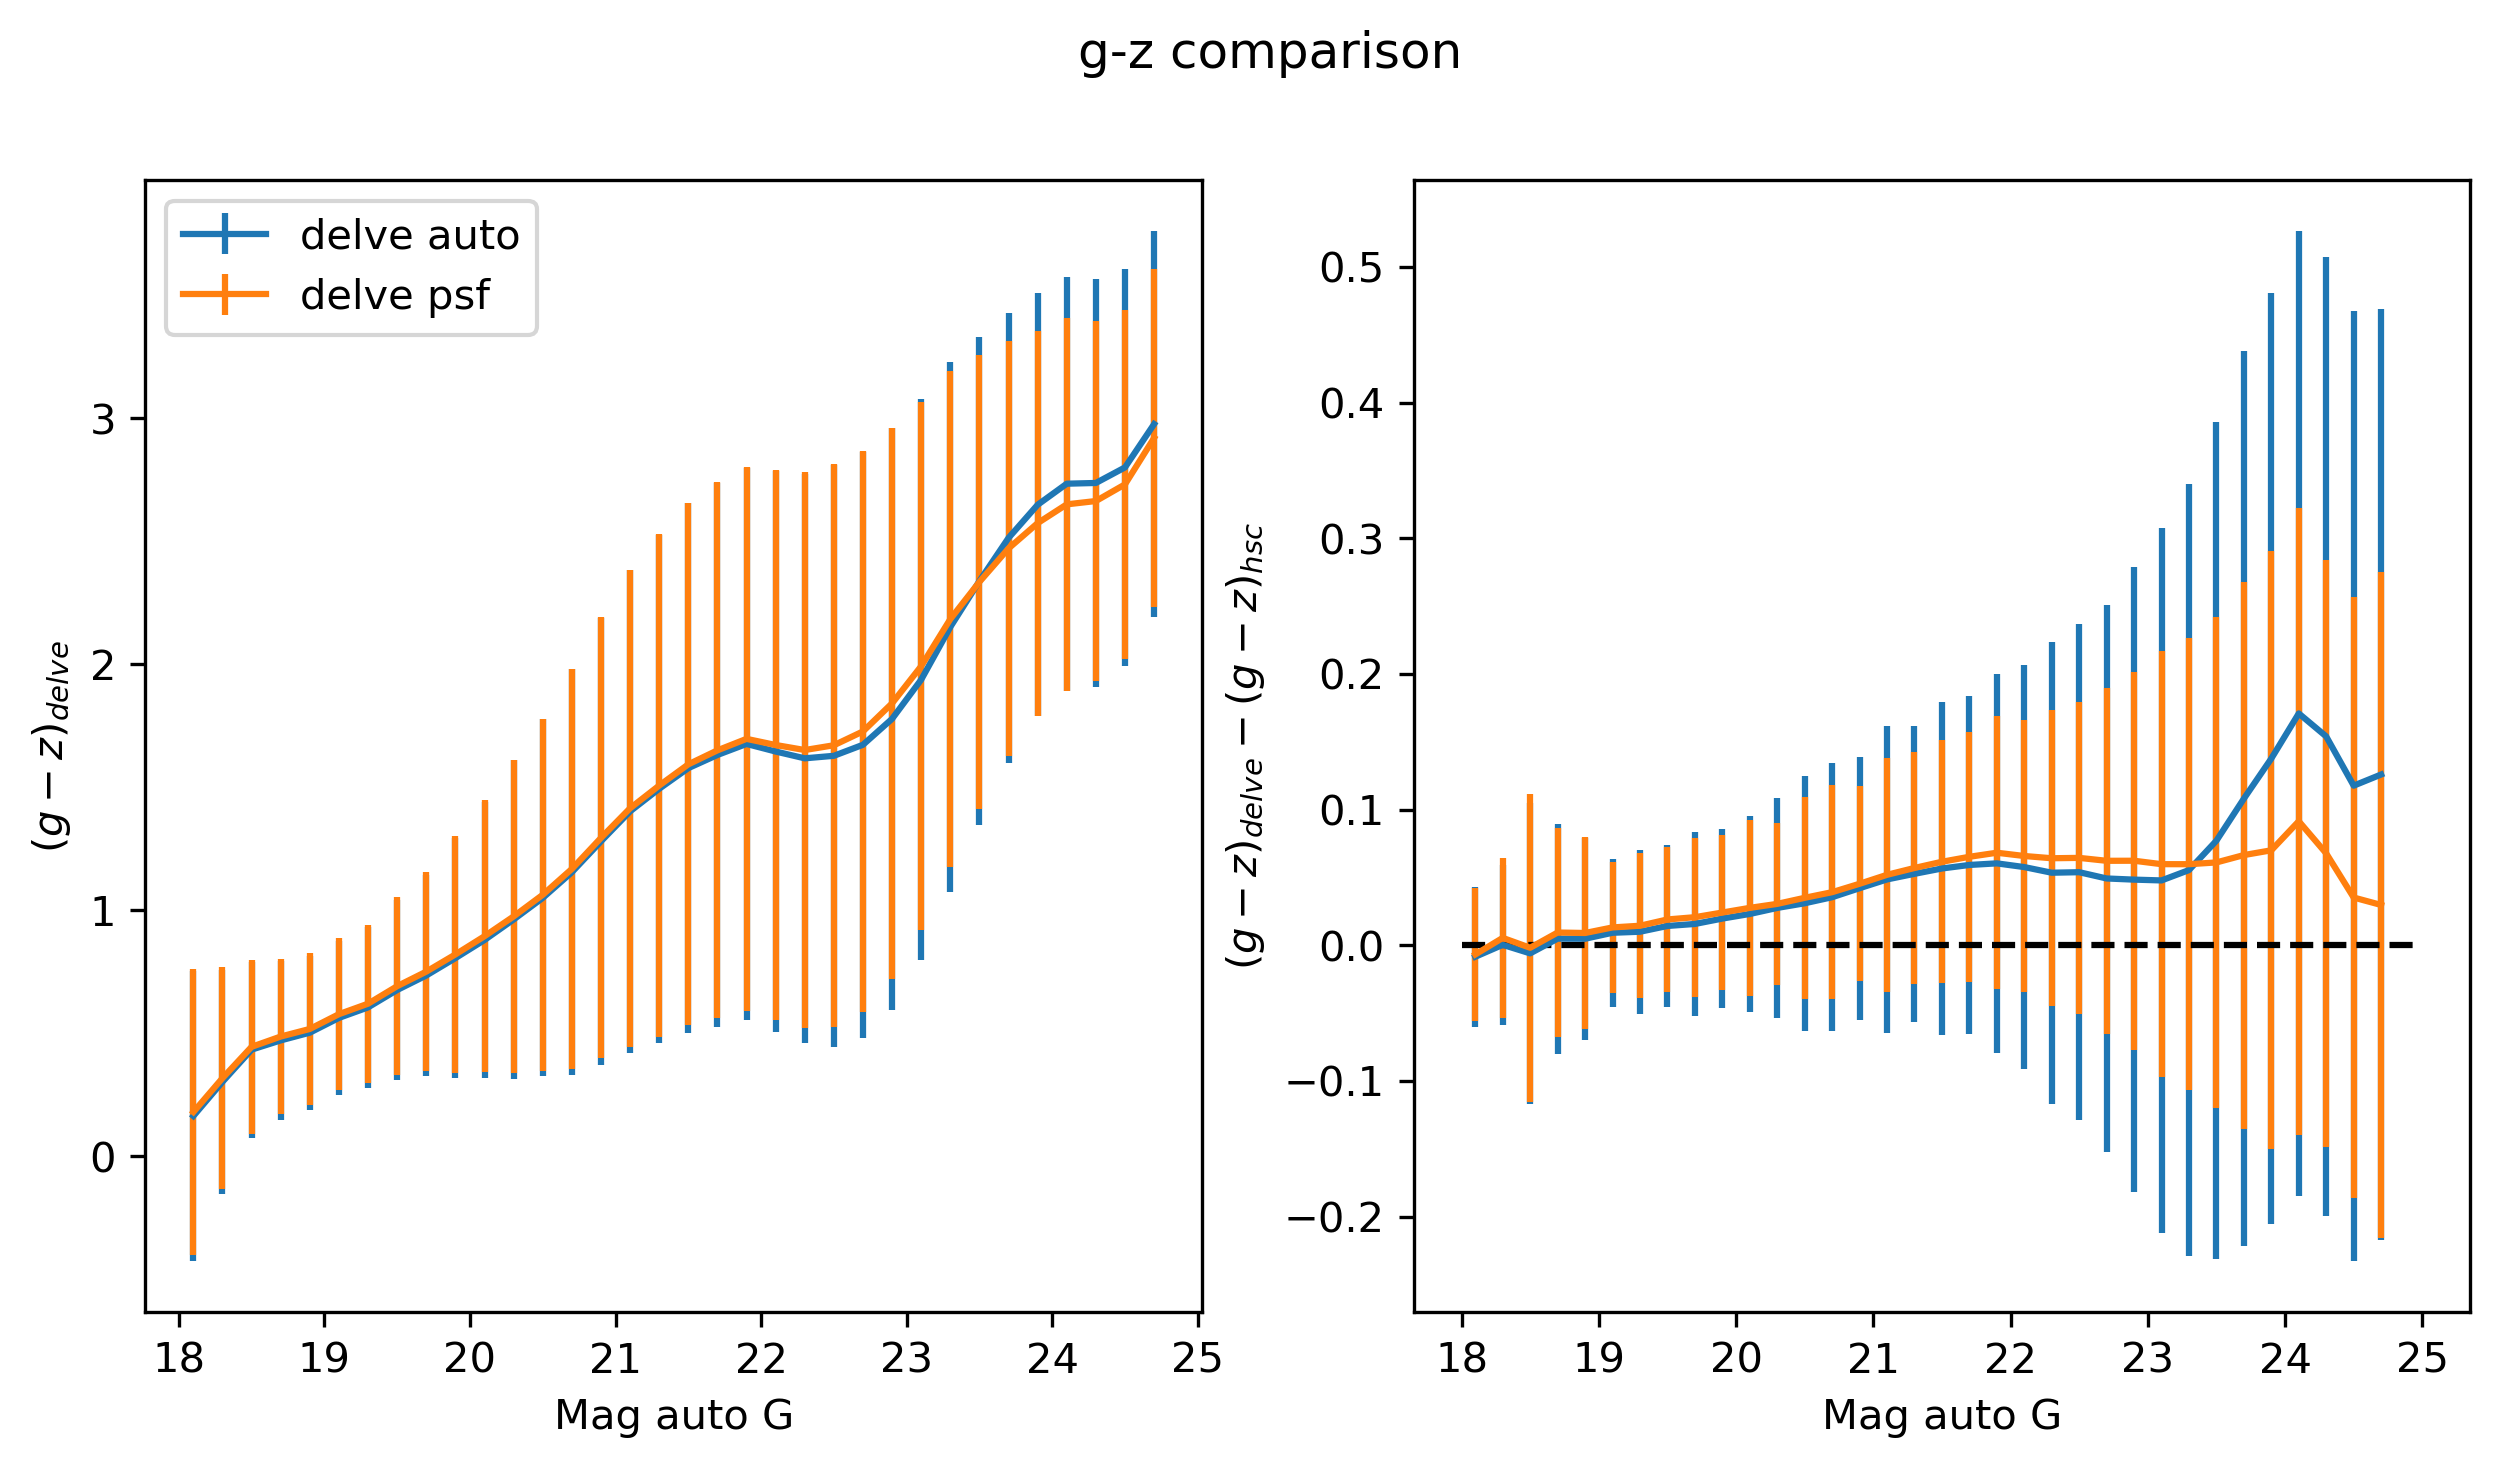

In [381]:
fig=plt.figure(dpi=300, figsize=(10,5))
plt.suptitle("g-z comparison")
plt.subplot(121)
#plt.scatter(stargal_fr["mag_g"],stargal_fr["psf_diff_mean"])
plt.errorbar(gzframe["mag_g"],gzframe["gr_auto_mean"],yerr=gzframe["gr_auto_sd"], label="delve auto")
plt.errorbar(gzframe["mag_g"],gzframe["gr_psf_mean"],yerr=gzframe["gr_psf_sd"],   label="delve psf")


plt.xlabel("Mag auto G")
plt.ylabel("$(g-z)_{delve}$")
#plt.scatter(stargal_fr["mag_g"],stargal_fr["auto_diff_mean"])
plt.legend(loc=2)
plt.subplot(122)
#plt.scatter(stargal_fr["mag_g"],stargal_fr["psf_diff_mean"])
plt.errorbar(grframe["mag_g"],grframe["gr_auto_diff_mean"],yerr=grframe["gr_auto_diff_sd"], label="delve auto")
plt.errorbar(grframe["mag_g"],grframe["gr_psf_diff_mean"],yerr=grframe["gr_psf_diff_sd"],label="delve psf")

plt.hlines(y=0,xmin=18,xmax=25, linestyle="--")
plt.xlabel("Mag auto G")
plt.ylabel(r"$(g-z)_{delve}-(g-z)_{hsc}$")
#plt.scatter(stargal_fr["mag_g"],stargal_fr["auto_diff_mean"])
#plt.legend(loc=2)
plt.savefig("../plots/gz_comp.png")